In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, ELU, LeakyReLU
from keras import models, optimizers
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras import backend as K

Using TensorFlow backend.


In [2]:
# dimensions of our images.
img_width, img_height = 125, 125

In [3]:
#paths
train_data_dir = 'Dataset//Head//train2'
validation_data_dir = 'Dataset//Head//test2'

In [13]:
#number of images for trainig and testing
nb_train_samples =  2932
nb_validation_samples = 402

#epochs, batch size and number of classes
epochs = 1000
batch_size = 16
number_classes = 7

In [5]:
#Adjusting shape
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [6]:
#CNN architecture
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))

model.add(Conv2D(32, (8, 8)))
model.add(Activation('relu'))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

model.add(Conv2D(32, (6, 6)))
model.add(Activation('relu'))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (4, 4)))
model.add(Activation('relu'))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))


model.add(Flatten())

#Dense Neural Net 

model.add(Dropout(0.25))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(number_classes))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 123, 123, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 123, 123, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 116, 116, 32)      65568     
_________________________________________________________________
activation_2 (Activation)    (None, 116, 116, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 115, 115, 32)      4128      
_________________________________________________________________
activation_3 (Activation)    (None, 115, 115, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 57, 57, 32)        0         
__________

In [8]:
#Rest
opt=optimizers.SGD(lr=0.1,momentum=0.9)

model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [9]:
#Configuration for training
#We rescale la image, make some rotation, zoom the image and change the brightness a little bit 

#train_datagen = ImageDataGenerator(
#        rescale=1. / 255)
train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        rotation_range=15,
        zoom_range=0.5,
        brightness_range=(0.0, 1.7),
        fill_mode='nearest')

In [10]:
#Augmentation configuration for testing: only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [11]:
#Getting images for trainig
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size)

Found 2932 images belonging to 7 classes.


In [12]:
#Getting images for validation
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size)

Found 402 images belonging to 7 classes.


In [14]:
#training
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
183/183 [==============================] - 10s 57ms/step - loss: 1.9448 - acc: 0.1554 - val_loss: 1.9480 - val_acc: 0.1350
Epoch 2/1000
183/183 [==============================] - 8s 44ms/step - loss: 1.9444 - acc: 0.1595 - val_loss: 1.9493 - val_acc: 0.1373
Epoch 3/1000
183/183 [==============================] - 8s 44ms/step - loss: 1.9448 - acc: 0.1506 - val_loss: 1.9496 - val_acc: 0.1295
Epoch 4/1000
183/183 [==============================] - 8s 44ms/step - loss: 1.9430 - acc: 0.1691 - val_loss: 1.9505 - val_acc: 0.1477
Epoch 5/1000
183/183 [==============================] - 8s 44ms/step - loss: 1.9433 - acc: 0.1537 - val_loss: 1.9510 - val_acc: 0.1347
Epoch 6/1000
183/183 [==============================] - 8s 44ms/step - loss: 1.9432 - acc: 0.1581 - val_loss: 1.9489 - val_acc: 0.1477
Epoch 7/1000
183/183 [==============================] - 8s 44ms/step - loss: 1.9448 - acc: 0.1564 - val_loss: 1.9498 - val_acc: 0.1347
Epoch 

In [15]:
#Save model
model.save('zelda_head3.h5')

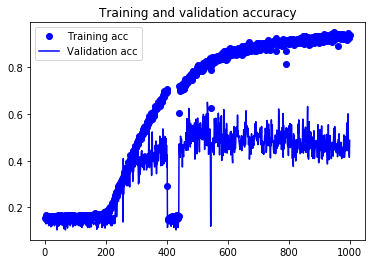

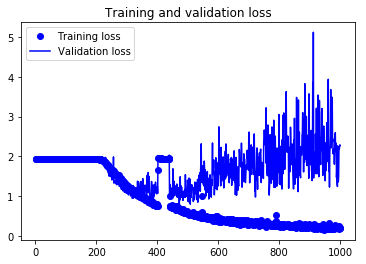

In [16]:
%matplotlib inline
import glob
import matplotlib
from matplotlib import pyplot as plt

#Used to plot a graph. It is useful to know if the model is overfitted

#Variables from history
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Plotting the graph
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
#Data to create the confusion matrix
matrix_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode = 'categorical', 
    shuffle=False)

Y_test = model.predict_generator(matrix_generator, nb_validation_samples // batch_size +1 )
y_test = np.argmax(Y_test, axis=1)

Found 402 images belonging to 7 classes.


In [18]:
#Print the confusion matrix
print(confusion_matrix(matrix_generator.classes, y_test))

[[ 0  6  5  1 46  0  0]
 [ 0 54  0  0  0  0  0]
 [ 0  0  2  6 52  0  0]
 [ 0  0  3  5 47  1  0]
 [ 0  0  2  0 54  0  0]
 [ 0 61  0  0  0  3  0]
 [ 1  0  1  0  0  0 52]]


In [19]:
target_names = ['A','K','M','N','S','V','Y']
print(classification_report(matrix_generator.classes, y_test, target_names=target_names))

              precision    recall  f1-score   support

           A       0.00      0.00      0.00        58
           K       0.45      1.00      0.62        54
           M       0.15      0.03      0.05        60
           N       0.42      0.09      0.15        56
           S       0.27      0.96      0.42        56
           V       0.75      0.05      0.09        64
           Y       1.00      0.96      0.98        54

   micro avg       0.42      0.42      0.42       402
   macro avg       0.43      0.44      0.33       402
weighted avg       0.43      0.42      0.32       402



Test1.ZeldaHead

Dataset: trainreduced

    train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        rotation_range=15,
        zoom_range=0.5,
        brightness_range=(0.0, 1.7),
        fill_mode='nearest')
        
Arquitectura: 7 conv2d, dos pooling 2x2, una capa oculta, filtros pequeños antes. RElu
Regularización: drouput 0.5 y 0.2 eN input
Optimizador: sgd lr 0.1 momentum 0.9
Resultados: no converge aceptablemente

Test2.ZeldaHead

Dataset: trainreduced

    train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        rotation_range=15,
        zoom_range=0.5,
        brightness_range=(0.0, 1.7),
        fill_mode='nearest')
        
Arquitectura: 7 conv2d mas peque;as, dos pooling 2x2, una capa oculta, filtros pequeños antes. RElu
Regularización: drouput 0.5 y 0.2 eN input
Optimizador: sgd lr 0.1 momentum 0.9
Resultados: no converge aceptablemente

Epoch 1/1000
184/184 [==============================] - 10s 55ms/step - loss: 1.9462 - acc: 0.1430 - val_loss: 1.9444 - val_acc: 0.1667
Epoch 2/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9453 - acc: 0.1440 - val_loss: 1.9433 - val_acc: 0.1676
Epoch 3/1000
184/184 [==============================] - 8s 45ms/step - loss: 1.9448 - acc: 0.1556 - val_loss: 1.9448 - val_acc: 0.1622
Epoch 4/1000
184/184 [==============================] - 8s 45ms/step - loss: 1.9447 - acc: 0.1579 - val_loss: 1.9439 - val_acc: 0.1595
Epoch 5/1000
184/184 [==============================] - 8s 45ms/step - loss: 1.9440 - acc: 0.1603 - val_loss: 1.9423 - val_acc: 0.1676
Epoch 6/1000
184/184 [==============================] - 8s 45ms/step - loss: 1.9449 - acc: 0.1549 - val_loss: 1.9460 - val_acc: 0.1676
Epoch 7/1000
184/184 [==============================] - 8s 45ms/step - loss: 1.9443 - acc: 0.1556 - val_loss: 1.9408 - val_acc: 0.1784
Epoch 8/1000
184/184 [==============================] - 8s 45ms/step - loss: 1.9441 - acc: 0.1562 - val_loss: 1.9442 - val_acc: 0.1568
Epoch 9/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9443 - acc: 0.1566 - val_loss: 1.9429 - val_acc: 0.1595
Epoch 10/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9443 - acc: 0.1552 - val_loss: 1.9449 - val_acc: 0.1595
Epoch 11/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9442 - acc: 0.1461 - val_loss: 1.9417 - val_acc: 0.1784
Epoch 12/1000
184/184 [==============================] - 8s 45ms/step - loss: 1.9445 - acc: 0.1607 - val_loss: 1.9445 - val_acc: 0.1757
Epoch 13/1000
184/184 [==============================] - 8s 45ms/step - loss: 1.9437 - acc: 0.1525 - val_loss: 1.9453 - val_acc: 0.1324
Epoch 14/1000
184/184 [==============================] - 8s 45ms/step - loss: 1.9453 - acc: 0.1461 - val_loss: 1.9409 - val_acc: 0.1946
Epoch 15/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9442 - acc: 0.1586 - val_loss: 1.9450 - val_acc: 0.1486
Epoch 16/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9446 - acc: 0.1535 - val_loss: 1.9436 - val_acc: 0.1811
Epoch 17/1000
184/184 [==============================] - 8s 45ms/step - loss: 1.9452 - acc: 0.1508 - val_loss: 1.9454 - val_acc: 0.1459
Epoch 18/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9446 - acc: 0.1522 - val_loss: 1.9416 - val_acc: 0.1784
Epoch 19/1000
184/184 [==============================] - 8s 45ms/step - loss: 1.9438 - acc: 0.1559 - val_loss: 1.9426 - val_acc: 0.1622
Epoch 20/1000
184/184 [==============================] - 8s 45ms/step - loss: 1.9432 - acc: 0.1569 - val_loss: 1.9443 - val_acc: 0.1784
Epoch 21/1000
184/184 [==============================] - 8s 45ms/step - loss: 1.9454 - acc: 0.1495 - val_loss: 1.9433 - val_acc: 0.1595
Epoch 22/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9452 - acc: 0.1535 - val_loss: 1.9425 - val_acc: 0.1676
Epoch 23/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9434 - acc: 0.1576 - val_loss: 1.9448 - val_acc: 0.1676
Epoch 24/1000
184/184 [==============================] - 8s 45ms/step - loss: 1.9442 - acc: 0.1539 - val_loss: 1.9443 - val_acc: 0.1568
Epoch 25/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9442 - acc: 0.1630 - val_loss: 1.9423 - val_acc: 0.1730
Epoch 26/1000
184/184 [==============================] - 8s 45ms/step - loss: 1.9446 - acc: 0.1522 - val_loss: 1.9438 - val_acc: 0.1641
Epoch 27/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9441 - acc: 0.1610 - val_loss: 1.9423 - val_acc: 0.1703
Epoch 28/1000
184/184 [==============================] - 8s 45ms/step - loss: 1.9437 - acc: 0.1481 - val_loss: 1.9442 - val_acc: 0.1622
Epoch 29/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9450 - acc: 0.1566 - val_loss: 1.9445 - val_acc: 0.1541
Epoch 30/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9443 - acc: 0.1515 - val_loss: 1.9431 - val_acc: 0.1730
Epoch 31/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9433 - acc: 0.1644 - val_loss: 1.9449 - val_acc: 0.1568
Epoch 32/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9436 - acc: 0.1569 - val_loss: 1.9402 - val_acc: 0.1730
Epoch 33/1000
184/184 [==============================] - 8s 45ms/step - loss: 1.9453 - acc: 0.1498 - val_loss: 1.9450 - val_acc: 0.1784
Epoch 34/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9445 - acc: 0.1559 - val_loss: 1.9437 - val_acc: 0.1757
Epoch 35/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9445 - acc: 0.1529 - val_loss: 1.9425 - val_acc: 0.1568
Epoch 36/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9430 - acc: 0.1569 - val_loss: 1.9414 - val_acc: 0.1703
Epoch 37/1000
184/184 [==============================] - 8s 45ms/step - loss: 1.9439 - acc: 0.1556 - val_loss: 1.9455 - val_acc: 0.1595
Epoch 38/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9458 - acc: 0.1539 - val_loss: 1.9452 - val_acc: 0.1703
Epoch 39/1000
184/184 [==============================] - 8s 45ms/step - loss: 1.9429 - acc: 0.1674 - val_loss: 1.9435 - val_acc: 0.1541
Epoch 40/1000
184/184 [==============================] - 8s 45ms/step - loss: 1.9457 - acc: 0.1464 - val_loss: 1.9440 - val_acc: 0.1811
Epoch 41/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9432 - acc: 0.1593 - val_loss: 1.9443 - val_acc: 0.1514
Epoch 42/1000
184/184 [==============================] - 8s 45ms/step - loss: 1.9440 - acc: 0.1600 - val_loss: 1.9438 - val_acc: 0.1649
Epoch 43/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9456 - acc: 0.1433 - val_loss: 1.9421 - val_acc: 0.1811
Epoch 44/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9428 - acc: 0.1600 - val_loss: 1.9433 - val_acc: 0.1595
Epoch 45/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9442 - acc: 0.1545 - val_loss: 1.9438 - val_acc: 0.1595
Epoch 46/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9451 - acc: 0.1556 - val_loss: 1.9433 - val_acc: 0.1757
Epoch 47/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9434 - acc: 0.1505 - val_loss: 1.9421 - val_acc: 0.1676
Epoch 48/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9450 - acc: 0.1600 - val_loss: 1.9450 - val_acc: 0.1595
Epoch 49/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9448 - acc: 0.1491 - val_loss: 1.9451 - val_acc: 0.1568
Epoch 50/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9438 - acc: 0.1603 - val_loss: 1.9428 - val_acc: 0.1703
Epoch 51/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9431 - acc: 0.1552 - val_loss: 1.9438 - val_acc: 0.1667
Epoch 52/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9453 - acc: 0.1542 - val_loss: 1.9424 - val_acc: 0.1649
Epoch 53/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9443 - acc: 0.1590 - val_loss: 1.9436 - val_acc: 0.1649
Epoch 54/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9445 - acc: 0.1556 - val_loss: 1.9437 - val_acc: 0.1703
Epoch 55/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9441 - acc: 0.1573 - val_loss: 1.9455 - val_acc: 0.1514
Epoch 56/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9437 - acc: 0.1430 - val_loss: 1.9403 - val_acc: 0.1838
Epoch 57/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9444 - acc: 0.1654 - val_loss: 1.9433 - val_acc: 0.1649
Epoch 58/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9446 - acc: 0.1569 - val_loss: 1.9467 - val_acc: 0.1405
Epoch 59/1000

184/184 [==============================] - 8s 44ms/step - loss: 1.9448 - acc: 0.1505 - val_loss: 1.9452 - val_acc: 0.1757
Epoch 60/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9432 - acc: 0.1563 - val_loss: 1.9388 - val_acc: 0.1865
Epoch 61/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9444 - acc: 0.1576 - val_loss: 1.9448 - val_acc: 0.1676
Epoch 62/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9438 - acc: 0.1518 - val_loss: 1.9459 - val_acc: 0.1405
Epoch 63/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9442 - acc: 0.1549 - val_loss: 1.9458 - val_acc: 0.1676
Epoch 64/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9445 - acc: 0.1549 - val_loss: 1.9388 - val_acc: 0.1811
Epoch 65/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9438 - acc: 0.1569 - val_loss: 1.9455 - val_acc: 0.1514
Epoch 66/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9446 - acc: 0.1545 - val_loss: 1.9410 - val_acc: 0.1676
Epoch 67/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9444 - acc: 0.1525 - val_loss: 1.9460 - val_acc: 0.1649
Epoch 68/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9443 - acc: 0.1546 - val_loss: 1.9464 - val_acc: 0.1622
Epoch 69/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9428 - acc: 0.1627 - val_loss: 1.9405 - val_acc: 0.1703
Epoch 70/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9447 - acc: 0.1457 - val_loss: 1.9395 - val_acc: 0.1784
Epoch 71/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9440 - acc: 0.1593 - val_loss: 1.9442 - val_acc: 0.1622
Epoch 72/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9444 - acc: 0.1542 - val_loss: 1.9455 - val_acc: 0.1568
Epoch 73/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9439 - acc: 0.1624 - val_loss: 1.9402 - val_acc: 0.1865
Epoch 74/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9441 - acc: 0.1508 - val_loss: 1.9440 - val_acc: 0.1541
Epoch 75/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9452 - acc: 0.1512 - val_loss: 1.9439 - val_acc: 0.1649
Epoch 76/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9442 - acc: 0.1481 - val_loss: 1.9439 - val_acc: 0.1667
Epoch 77/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9451 - acc: 0.1593 - val_loss: 1.9436 - val_acc: 0.1595
Epoch 78/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9429 - acc: 0.1593 - val_loss: 1.9434 - val_acc: 0.1703
Epoch 79/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9449 - acc: 0.1495 - val_loss: 1.9439 - val_acc: 0.1486
Epoch 80/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9446 - acc: 0.1556 - val_loss: 1.9429 - val_acc: 0.1865
Epoch 81/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9434 - acc: 0.1630 - val_loss: 1.9418 - val_acc: 0.1649
Epoch 82/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9437 - acc: 0.1532 - val_loss: 1.9449 - val_acc: 0.1622
Epoch 83/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9455 - acc: 0.1542 - val_loss: 1.9434 - val_acc: 0.1649
Epoch 84/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9433 - acc: 0.1562 - val_loss: 1.9434 - val_acc: 0.1757
Epoch 85/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9441 - acc: 0.1576 - val_loss: 1.9401 - val_acc: 0.1649
Epoch 86/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9456 - acc: 0.1478 - val_loss: 1.9464 - val_acc: 0.1595
Epoch 87/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9424 - acc: 0.1678 - val_loss: 1.9449 - val_acc: 0.1757
Epoch 88/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9439 - acc: 0.1518 - val_loss: 1.9413 - val_acc: 0.1514
Epoch 89/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9433 - acc: 0.1539 - val_loss: 1.9436 - val_acc: 0.1595
Epoch 90/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9453 - acc: 0.1562 - val_loss: 1.9451 - val_acc: 0.1703
Epoch 91/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9442 - acc: 0.1552 - val_loss: 1.9422 - val_acc: 0.1784
Epoch 92/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9433 - acc: 0.1603 - val_loss: 1.9399 - val_acc: 0.1676
Epoch 93/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9445 - acc: 0.1474 - val_loss: 1.9476 - val_acc: 0.1568
Epoch 94/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9447 - acc: 0.1535 - val_loss: 1.9424 - val_acc: 0.1622
Epoch 95/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9439 - acc: 0.1549 - val_loss: 1.9425 - val_acc: 0.1784
Epoch 96/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9438 - acc: 0.1569 - val_loss: 1.9431 - val_acc: 0.1595
Epoch 97/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9437 - acc: 0.1613 - val_loss: 1.9418 - val_acc: 0.1595
Epoch 98/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9452 - acc: 0.1512 - val_loss: 1.9444 - val_acc: 0.1649
Epoch 99/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9428 - acc: 0.1535 - val_loss: 1.9431 - val_acc: 0.1784
Epoch 100/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9434 - acc: 0.1593 - val_loss: 1.9441 - val_acc: 0.1595
Epoch 101/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9443 - acc: 0.1546 - val_loss: 1.9425 - val_acc: 0.1667
Epoch 102/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9444 - acc: 0.1518 - val_loss: 1.9444 - val_acc: 0.1595
Epoch 103/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9427 - acc: 0.1647 - val_loss: 1.9434 - val_acc: 0.1676
Epoch 104/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9435 - acc: 0.1495 - val_loss: 1.9414 - val_acc: 0.1676
Epoch 105/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9438 - acc: 0.1532 - val_loss: 1.9448 - val_acc: 0.1676
Epoch 106/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9441 - acc: 0.1559 - val_loss: 1.9422 - val_acc: 0.1649
Epoch 107/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9440 - acc: 0.1430 - val_loss: 1.9426 - val_acc: 0.1432
Epoch 108/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9439 - acc: 0.1627 - val_loss: 1.9425 - val_acc: 0.1757
Epoch 109/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9434 - acc: 0.1596 - val_loss: 1.9441 - val_acc: 0.1514
Epoch 110/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9451 - acc: 0.1440 - val_loss: 1.9457 - val_acc: 0.1676
Epoch 111/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9434 - acc: 0.1637 - val_loss: 1.9421 - val_acc: 0.1703
Epoch 112/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9436 - acc: 0.1501 - val_loss: 1.9392 - val_acc: 0.1703
Epoch 113/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9432 - acc: 0.1664 - val_loss: 1.9474 - val_acc: 0.1432
Epoch 114/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9455 - acc: 0.1508 - val_loss: 1.9388 - val_acc: 0.1919
Epoch 115/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9415 - acc: 0.1532 - val_loss: 1.9450 - val_acc: 0.1568
Epoch 116/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9440 - acc: 0.1389 - val_loss: 1.9405 - val_acc: 0.1865
Epoch 117/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9421 - acc: 0.1603 - val_loss: 1.9446 - val_acc: 0.1514
Epoch 118/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9436 - acc: 0.1491 - val_loss: 1.9394 - val_acc: 0.1838
Epoch 119/1000

184/184 [==============================] - 8s 44ms/step - loss: 1.9420 - acc: 0.1732 - val_loss: 1.9439 - val_acc: 0.2000
Epoch 120/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9427 - acc: 0.1620 - val_loss: 1.9427 - val_acc: 0.1459
Epoch 121/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9417 - acc: 0.1512 - val_loss: 1.9469 - val_acc: 0.1595
Epoch 122/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9413 - acc: 0.1654 - val_loss: 1.9371 - val_acc: 0.1811
Epoch 123/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9434 - acc: 0.1535 - val_loss: 1.9430 - val_acc: 0.1946
Epoch 124/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9403 - acc: 0.1641 - val_loss: 1.9407 - val_acc: 0.1730
Epoch 125/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9416 - acc: 0.1607 - val_loss: 1.9408 - val_acc: 0.1892
Epoch 126/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9409 - acc: 0.1634 - val_loss: 1.9402 - val_acc: 0.1615
Epoch 127/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9403 - acc: 0.1641 - val_loss: 1.9412 - val_acc: 0.1676
Epoch 128/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9433 - acc: 0.1583 - val_loss: 1.9411 - val_acc: 0.1405
Epoch 129/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9392 - acc: 0.1647 - val_loss: 1.9367 - val_acc: 0.2162
Epoch 130/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9405 - acc: 0.1607 - val_loss: 1.9379 - val_acc: 0.1946
Epoch 131/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9380 - acc: 0.1743 - val_loss: 1.9406 - val_acc: 0.1622
Epoch 132/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9396 - acc: 0.1736 - val_loss: 1.9438 - val_acc: 0.1865
Epoch 133/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9385 - acc: 0.1668 - val_loss: 1.9354 - val_acc: 0.1919
Epoch 134/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9341 - acc: 0.1790 - val_loss: 1.9347 - val_acc: 0.1703
Epoch 135/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9380 - acc: 0.1586 - val_loss: 1.9337 - val_acc: 0.1676
Epoch 136/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9377 - acc: 0.1729 - val_loss: 1.9374 - val_acc: 0.1351
Epoch 137/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9319 - acc: 0.1688 - val_loss: 1.9350 - val_acc: 0.1973
Epoch 138/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9318 - acc: 0.1793 - val_loss: 1.9291 - val_acc: 0.2000
Epoch 139/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9293 - acc: 0.1807 - val_loss: 1.9364 - val_acc: 0.1243
Epoch 140/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9308 - acc: 0.1787 - val_loss: 1.9328 - val_acc: 0.1514
Epoch 141/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9281 - acc: 0.1777 - val_loss: 1.9375 - val_acc: 0.1730
Epoch 142/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9281 - acc: 0.1732 - val_loss: 1.9401 - val_acc: 0.2189
Epoch 143/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9297 - acc: 0.1794 - val_loss: 1.9304 - val_acc: 0.1730
Epoch 144/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9220 - acc: 0.1800 - val_loss: 1.9352 - val_acc: 0.1703
Epoch 145/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9275 - acc: 0.1753 - val_loss: 1.9306 - val_acc: 0.2108
Epoch 146/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9222 - acc: 0.1902 - val_loss: 1.9437 - val_acc: 0.1541
Epoch 147/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9236 - acc: 0.1759 - val_loss: 1.9320 - val_acc: 0.2135
Epoch 148/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9228 - acc: 0.1851 - val_loss: 1.9483 - val_acc: 0.1378
Epoch 149/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9219 - acc: 0.1865 - val_loss: 1.9421 - val_acc: 0.1649
Epoch 150/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9232 - acc: 0.1892 - val_loss: 1.9482 - val_acc: 0.1432
Epoch 151/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9185 - acc: 0.1892 - val_loss: 1.9429 - val_acc: 0.1302
Epoch 152/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9171 - acc: 0.2055 - val_loss: 1.9420 - val_acc: 0.1568
Epoch 153/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9179 - acc: 0.1899 - val_loss: 1.9457 - val_acc: 0.1108
Epoch 154/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9085 - acc: 0.2008 - val_loss: 1.9518 - val_acc: 0.2027
Epoch 155/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9122 - acc: 0.1902 - val_loss: 1.9551 - val_acc: 0.1270
Epoch 156/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9118 - acc: 0.2048 - val_loss: 1.9550 - val_acc: 0.1622
Epoch 157/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9078 - acc: 0.2062 - val_loss: 1.9463 - val_acc: 0.1541
Epoch 158/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9056 - acc: 0.1957 - val_loss: 1.9408 - val_acc: 0.1541
Epoch 159/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9051 - acc: 0.2018 - val_loss: 1.9850 - val_acc: 0.1514
Epoch 160/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9107 - acc: 0.1940 - val_loss: 1.9500 - val_acc: 0.1784
Epoch 161/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9012 - acc: 0.2092 - val_loss: 1.9554 - val_acc: 0.1730
Epoch 162/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9010 - acc: 0.2072 - val_loss: 1.9495 - val_acc: 0.1838
Epoch 163/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.8988 - acc: 0.2045 - val_loss: 1.9565 - val_acc: 0.1784
Epoch 164/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.8982 - acc: 0.2041 - val_loss: 1.9426 - val_acc: 0.1946
Epoch 165/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.9021 - acc: 0.2058 - val_loss: 1.9361 - val_acc: 0.2081
Epoch 166/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.8971 - acc: 0.2052 - val_loss: 1.9300 - val_acc: 0.2568
Epoch 167/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.8948 - acc: 0.2130 - val_loss: 1.9445 - val_acc: 0.1595
Epoch 168/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.8875 - acc: 0.2123 - val_loss: 1.9538 - val_acc: 0.1595
Epoch 169/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.8968 - acc: 0.2041 - val_loss: 1.9547 - val_acc: 0.1676
Epoch 170/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.8823 - acc: 0.2198 - val_loss: 1.9582 - val_acc: 0.1730
Epoch 171/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.8821 - acc: 0.2157 - val_loss: 1.9490 - val_acc: 0.1730
Epoch 172/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.8821 - acc: 0.2242 - val_loss: 1.9426 - val_acc: 0.1865
Epoch 173/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.8760 - acc: 0.2143 - val_loss: 1.9639 - val_acc: 0.1649
Epoch 174/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.8836 - acc: 0.2249 - val_loss: 1.9552 - val_acc: 0.1838
Epoch 175/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.8831 - acc: 0.2221 - val_loss: 1.9532 - val_acc: 0.1595
Epoch 176/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.8757 - acc: 0.2228 - val_loss: 1.9453 - val_acc: 0.1979
Epoch 177/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.8773 - acc: 0.2266 - val_loss: 1.9491 - val_acc: 0.1676
Epoch 178/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.8766 - acc: 0.2300 - val_loss: 1.9676 - val_acc: 0.1865

Epoch 179/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.8771 - acc: 0.2171 - val_loss: 1.9566 - val_acc: 0.2081
Epoch 180/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.8661 - acc: 0.2330 - val_loss: 1.9490 - val_acc: 0.1838
Epoch 181/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.8522 - acc: 0.2385 - val_loss: 1.9535 - val_acc: 0.1838
Epoch 182/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.8607 - acc: 0.2334 - val_loss: 1.9458 - val_acc: 0.1595
Epoch 183/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.8801 - acc: 0.2266 - val_loss: 1.9473 - val_acc: 0.1703
Epoch 184/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.8556 - acc: 0.2259 - val_loss: 1.9649 - val_acc: 0.1541
Epoch 185/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.8559 - acc: 0.2266 - val_loss: 1.9691 - val_acc: 0.1676
Epoch 186/1000
184/184 [==============================] - 8s 45ms/step - loss: 1.8422 - acc: 0.2463 - val_loss: 1.9673 - val_acc: 0.1622
Epoch 187/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.8556 - acc: 0.2378 - val_loss: 1.9597 - val_acc: 0.1676
Epoch 188/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.8504 - acc: 0.2497 - val_loss: 1.9863 - val_acc: 0.1811
Epoch 189/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.8429 - acc: 0.2408 - val_loss: 1.9721 - val_acc: 0.1703
Epoch 190/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.8458 - acc: 0.2422 - val_loss: 1.9825 - val_acc: 0.1568
Epoch 191/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.8396 - acc: 0.2483 - val_loss: 1.9691 - val_acc: 0.1892
Epoch 192/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.8313 - acc: 0.2493 - val_loss: 1.9649 - val_acc: 0.1838
Epoch 193/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.8477 - acc: 0.2408 - val_loss: 2.0039 - val_acc: 0.1486
Epoch 194/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.8304 - acc: 0.2541 - val_loss: 1.9892 - val_acc: 0.1622
Epoch 195/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.8163 - acc: 0.2551 - val_loss: 2.0044 - val_acc: 0.1514
Epoch 196/1000
184/184 [==============================] - 8s 44ms/step - loss: 1.8203 - acc: 0.2551 - val_loss: 1.9682 - val_acc: 0.1541




Epoch 1/500
184/184 [==============================] - 11s 57ms/step - loss: 1.9454 - acc: 0.1474 - val_loss: 1.9436 - val_acc: 0.1615
Epoch 2/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9451 - acc: 0.1427 - val_loss: 1.9430 - val_acc: 0.1676
Epoch 3/500
184/184 [==============================] - 8s 44ms/step - loss: 1.9446 - acc: 0.1532 - val_loss: 1.9436 - val_acc: 0.1676
Epoch 4/500
184/184 [==============================] - 8s 44ms/step - loss: 1.9441 - acc: 0.1566 - val_loss: 1.9441 - val_acc: 0.1622
Epoch 5/500
184/184 [==============================] - 8s 44ms/step - loss: 1.9449 - acc: 0.1498 - val_loss: 1.9442 - val_acc: 0.1568
Epoch 6/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9445 - acc: 0.1539 - val_loss: 1.9434 - val_acc: 0.1730
Epoch 7/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9451 - acc: 0.1576 - val_loss: 1.9418 - val_acc: 0.1784
Epoch 8/500
184/184 [==============================] - 8s 44ms/step - loss: 1.9449 - acc: 0.1525 - val_loss: 1.9436 - val_acc: 0.1730
Epoch 9/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9443 - acc: 0.1552 - val_loss: 1.9430 - val_acc: 0.1541
Epoch 10/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9448 - acc: 0.1539 - val_loss: 1.9440 - val_acc: 0.1649
Epoch 11/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9441 - acc: 0.1549 - val_loss: 1.9437 - val_acc: 0.1811
Epoch 12/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9435 - acc: 0.1583 - val_loss: 1.9422 - val_acc: 0.1514
Epoch 13/500
184/184 [==============================] - 8s 44ms/step - loss: 1.9442 - acc: 0.1512 - val_loss: 1.9444 - val_acc: 0.1622
Epoch 14/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9442 - acc: 0.1461 - val_loss: 1.9421 - val_acc: 0.1703
Epoch 15/500
184/184 [==============================] - 8s 44ms/step - loss: 1.9455 - acc: 0.1467 - val_loss: 1.9466 - val_acc: 0.1541
Epoch 16/500
184/184 [==============================] - 8s 44ms/step - loss: 1.9442 - acc: 0.1484 - val_loss: 1.9433 - val_acc: 0.1730
Epoch 17/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9445 - acc: 0.1563 - val_loss: 1.9431 - val_acc: 0.1676
Epoch 18/500
184/184 [==============================] - 8s 44ms/step - loss: 1.9441 - acc: 0.1610 - val_loss: 1.9422 - val_acc: 0.1595
Epoch 19/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9440 - acc: 0.1498 - val_loss: 1.9435 - val_acc: 0.1757
Epoch 20/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9444 - acc: 0.1522 - val_loss: 1.9469 - val_acc: 0.1541
Epoch 21/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9450 - acc: 0.1515 - val_loss: 1.9405 - val_acc: 0.1703
Epoch 22/500
184/184 [==============================] - 8s 44ms/step - loss: 1.9437 - acc: 0.1617 - val_loss: 1.9436 - val_acc: 0.1649
Epoch 23/500
184/184 [==============================] - 8s 44ms/step - loss: 1.9445 - acc: 0.1529 - val_loss: 1.9432 - val_acc: 0.1757
Epoch 24/500
184/184 [==============================] - 8s 44ms/step - loss: 1.9441 - acc: 0.1532 - val_loss: 1.9428 - val_acc: 0.1622
Epoch 25/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9434 - acc: 0.1542 - val_loss: 1.9449 - val_acc: 0.1649
Epoch 26/500
184/184 [==============================] - 8s 44ms/step - loss: 1.9442 - acc: 0.1505 - val_loss: 1.9432 - val_acc: 0.1667
Epoch 27/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9454 - acc: 0.1573 - val_loss: 1.9444 - val_acc: 0.1649
Epoch 28/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9435 - acc: 0.1566 - val_loss: 1.9436 - val_acc: 0.1622
Epoch 29/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9442 - acc: 0.1583 - val_loss: 1.9448 - val_acc: 0.1568
Epoch 30/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9439 - acc: 0.1556 - val_loss: 1.9410 - val_acc: 0.1784
Epoch 31/500
184/184 [==============================] - 8s 44ms/step - loss: 1.9446 - acc: 0.1505 - val_loss: 1.9424 - val_acc: 0.1703
Epoch 32/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9439 - acc: 0.1569 - val_loss: 1.9464 - val_acc: 0.1459
Epoch 33/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9442 - acc: 0.1545 - val_loss: 1.9386 - val_acc: 0.2027
Epoch 34/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9438 - acc: 0.1539 - val_loss: 1.9450 - val_acc: 0.1568
Epoch 35/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9445 - acc: 0.1559 - val_loss: 1.9397 - val_acc: 0.1649
Epoch 36/500
184/184 [==============================] - 8s 44ms/step - loss: 1.9435 - acc: 0.1562 - val_loss: 1.9466 - val_acc: 0.1649
Epoch 37/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9443 - acc: 0.1495 - val_loss: 1.9448 - val_acc: 0.1432
Epoch 38/500
184/184 [==============================] - 8s 44ms/step - loss: 1.9443 - acc: 0.1525 - val_loss: 1.9438 - val_acc: 0.1919
Epoch 39/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9437 - acc: 0.1569 - val_loss: 1.9383 - val_acc: 0.1514
Epoch 40/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9449 - acc: 0.1556 - val_loss: 1.9464 - val_acc: 0.1676
Epoch 41/500
184/184 [==============================] - 8s 44ms/step - loss: 1.9437 - acc: 0.1474 - val_loss: 1.9441 - val_acc: 0.1486
Epoch 42/500
184/184 [==============================] - 8s 44ms/step - loss: 1.9421 - acc: 0.1627 - val_loss: 1.9409 - val_acc: 0.1865
Epoch 43/500
184/184 [==============================] - 8s 44ms/step - loss: 1.9434 - acc: 0.1607 - val_loss: 1.9411 - val_acc: 0.1676
Epoch 44/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9437 - acc: 0.1539 - val_loss: 1.9466 - val_acc: 0.1568
Epoch 45/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9430 - acc: 0.1559 - val_loss: 1.9430 - val_acc: 0.1649
Epoch 46/500
184/184 [==============================] - 8s 44ms/step - loss: 1.9436 - acc: 0.1498 - val_loss: 1.9414 - val_acc: 0.1595
Epoch 47/500
184/184 [==============================] - 8s 44ms/step - loss: 1.9439 - acc: 0.1603 - val_loss: 1.9450 - val_acc: 0.1784
Epoch 48/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9426 - acc: 0.1637 - val_loss: 1.9423 - val_acc: 0.1649
Epoch 49/500
184/184 [==============================] - 8s 44ms/step - loss: 1.9434 - acc: 0.1552 - val_loss: 1.9423 - val_acc: 0.1703
Epoch 50/500
184/184 [==============================] - 8s 44ms/step - loss: 1.9429 - acc: 0.1556 - val_loss: 1.9433 - val_acc: 0.1703
Epoch 51/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9406 - acc: 0.1675 - val_loss: 1.9429 - val_acc: 0.1667
Epoch 52/500
184/184 [==============================] - 8s 44ms/step - loss: 1.9445 - acc: 0.1552 - val_loss: 1.9424 - val_acc: 0.1676
Epoch 53/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9427 - acc: 0.1644 - val_loss: 1.9443 - val_acc: 0.1486
Epoch 54/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9413 - acc: 0.1634 - val_loss: 1.9399 - val_acc: 0.1838
Epoch 55/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9425 - acc: 0.1620 - val_loss: 1.9413 - val_acc: 0.1676
Epoch 56/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9414 - acc: 0.1613 - val_loss: 1.9417 - val_acc: 0.1676
Epoch 57/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9406 - acc: 0.1692 - val_loss: 1.9439 - val_acc: 0.1703
Epoch 58/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9434 - acc: 0.1586 - val_loss: 1.9411 - val_acc: 0.1811
Epoch 59/500
184/184 [==============================] - 8s 44ms/step - loss: 1.9411 - acc: 0.1593 - val_loss: 1.9405 - val_acc: 0.1838

Epoch 60/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9417 - acc: 0.1546 - val_loss: 1.9397 - val_acc: 0.1811
Epoch 61/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9396 - acc: 0.1675 - val_loss: 1.9448 - val_acc: 0.1324
Epoch 62/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9423 - acc: 0.1569 - val_loss: 1.9388 - val_acc: 0.1703
Epoch 63/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9375 - acc: 0.1627 - val_loss: 1.9417 - val_acc: 0.1703
Epoch 64/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9426 - acc: 0.1644 - val_loss: 1.9393 - val_acc: 0.1568
Epoch 65/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9377 - acc: 0.1709 - val_loss: 1.9413 - val_acc: 0.1676
Epoch 66/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9395 - acc: 0.1620 - val_loss: 1.9404 - val_acc: 0.1784
Epoch 67/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9418 - acc: 0.1542 - val_loss: 1.9435 - val_acc: 0.1568
Epoch 68/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9419 - acc: 0.1627 - val_loss: 1.9393 - val_acc: 0.1757
Epoch 69/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9404 - acc: 0.1630 - val_loss: 1.9403 - val_acc: 0.1649
Epoch 70/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9391 - acc: 0.1610 - val_loss: 1.9408 - val_acc: 0.1622
Epoch 71/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9338 - acc: 0.1865 - val_loss: 1.9387 - val_acc: 0.1649
Epoch 72/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9355 - acc: 0.1586 - val_loss: 1.9302 - val_acc: 0.2027
Epoch 73/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9413 - acc: 0.1715 - val_loss: 1.9391 - val_acc: 0.1595
Epoch 74/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9356 - acc: 0.1671 - val_loss: 1.9304 - val_acc: 0.1811
Epoch 75/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9339 - acc: 0.1858 - val_loss: 1.9417 - val_acc: 0.1595
Epoch 76/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9360 - acc: 0.1692 - val_loss: 1.9333 - val_acc: 0.1771
Epoch 77/500
184/184 [==============================] - 8s 44ms/step - loss: 1.9334 - acc: 0.1739 - val_loss: 1.9345 - val_acc: 0.1622
Epoch 78/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9312 - acc: 0.1814 - val_loss: 1.9330 - val_acc: 0.1784
Epoch 79/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9379 - acc: 0.1671 - val_loss: 1.9340 - val_acc: 0.1568
Epoch 80/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9360 - acc: 0.1746 - val_loss: 1.9337 - val_acc: 0.1649
Epoch 81/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9299 - acc: 0.1746 - val_loss: 1.9255 - val_acc: 0.1676
Epoch 82/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9312 - acc: 0.1841 - val_loss: 1.9451 - val_acc: 0.1486
Epoch 83/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9304 - acc: 0.1709 - val_loss: 1.9352 - val_acc: 0.1946
Epoch 84/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9234 - acc: 0.1794 - val_loss: 1.9427 - val_acc: 0.1459
Epoch 85/500
184/184 [==============================] - 8s 44ms/step - loss: 1.9304 - acc: 0.1804 - val_loss: 1.9395 - val_acc: 0.1622
Epoch 86/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9274 - acc: 0.1817 - val_loss: 1.9285 - val_acc: 0.1676
Epoch 87/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9256 - acc: 0.1841 - val_loss: 1.9440 - val_acc: 0.1568
Epoch 88/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9255 - acc: 0.1875 - val_loss: 1.9335 - val_acc: 0.1676
Epoch 89/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9261 - acc: 0.1739 - val_loss: 1.9425 - val_acc: 0.1703
Epoch 90/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9149 - acc: 0.1980 - val_loss: 1.9405 - val_acc: 0.1703
Epoch 91/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9145 - acc: 0.1970 - val_loss: 1.9268 - val_acc: 0.2000
Epoch 92/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9158 - acc: 0.1933 - val_loss: 1.9422 - val_acc: 0.1649
Epoch 93/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9034 - acc: 0.2075 - val_loss: 1.9314 - val_acc: 0.1649
Epoch 94/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9116 - acc: 0.1977 - val_loss: 1.9386 - val_acc: 0.1649
Epoch 95/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9088 - acc: 0.1885 - val_loss: 1.9448 - val_acc: 0.1405
Epoch 96/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9027 - acc: 0.2028 - val_loss: 1.9367 - val_acc: 0.1973
Epoch 97/500
184/184 [==============================] - 8s 45ms/step - loss: 1.8957 - acc: 0.2062 - val_loss: 1.9422 - val_acc: 0.1595
Epoch 98/500
184/184 [==============================] - 8s 45ms/step - loss: 1.9013 - acc: 0.2103 - val_loss: 1.9484 - val_acc: 0.1865
Epoch 99/500
184/184 [==============================] - 8s 45ms/step - loss: 1.8904 - acc: 0.2011 - val_loss: 1.9468 - val_acc: 0.1865
Epoch 100/500
184/184 [==============================] - 8s 46ms/step - loss: 1.8906 - acc: 0.2130 - val_loss: 1.9359 - val_acc: 0.1973
Epoch 101/500
184/184 [==============================] - 8s 45ms/step - loss: 1.8766 - acc: 0.2147 - val_loss: 1.9378 - val_acc: 0.2161
Epoch 102/500
184/184 [==============================] - 8s 44ms/step - loss: 1.8852 - acc: 0.2058 - val_loss: 1.9351 - val_acc: 0.1595
Epoch 103/500
184/184 [==============================] - 8s 45ms/step - loss: 1.8592 - acc: 0.2466 - val_loss: 1.9276 - val_acc: 0.1973
Epoch 104/500
184/184 [==============================] - 8s 45ms/step - loss: 1.8762 - acc: 0.2181 - val_loss: 1.9363 - val_acc: 0.1811
Epoch 105/500
184/184 [==============================] - 8s 45ms/step - loss: 1.8500 - acc: 0.2327 - val_loss: 1.9360 - val_acc: 0.1622
Epoch 106/500
184/184 [==============================] - 8s 45ms/step - loss: 1.8482 - acc: 0.2283 - val_loss: 1.9087 - val_acc: 0.1703
Epoch 107/500
184/184 [==============================] - 8s 45ms/step - loss: 1.8282 - acc: 0.2432 - val_loss: 1.9089 - val_acc: 0.2135
Epoch 108/500
184/184 [==============================] - 8s 45ms/step - loss: 1.8206 - acc: 0.2527 - val_loss: 1.9046 - val_acc: 0.2027
Epoch 109/500
184/184 [==============================] - 8s 45ms/step - loss: 1.8025 - acc: 0.2609 - val_loss: 1.9199 - val_acc: 0.2135
Epoch 110/500
184/184 [==============================] - 8s 45ms/step - loss: 1.7967 - acc: 0.2687 - val_loss: 1.9016 - val_acc: 0.1649
Epoch 111/500
184/184 [==============================] - 8s 45ms/step - loss: 1.8078 - acc: 0.2595 - val_loss: 1.8579 - val_acc: 0.2270
Epoch 112/500
184/184 [==============================] - 8s 45ms/step - loss: 1.7506 - acc: 0.2928 - val_loss: 1.8338 - val_acc: 0.2135
Epoch 113/500
184/184 [==============================] - 8s 45ms/step - loss: 1.7646 - acc: 0.2799 - val_loss: 1.8253 - val_acc: 0.2054
Epoch 114/500
184/184 [==============================] - 8s 45ms/step - loss: 1.7674 - acc: 0.2741 - val_loss: 1.8598 - val_acc: 0.2081
Epoch 115/500
184/184 [==============================] - 8s 45ms/step - loss: 1.7490 - acc: 0.2935 - val_loss: 1.7426 - val_acc: 0.2919
Epoch 116/500
184/184 [==============================] - 8s 45ms/step - loss: 1.7477 - acc: 0.2945 - val_loss: 1.8157 - val_acc: 0.2459
Epoch 117/500
184/184 [==============================] - 8s 45ms/step - loss: 1.7557 - acc: 0.2741 - val_loss: 1.8136 - val_acc: 0.2162
Epoch 118/500
184/184 [==============================] - 8s 45ms/step - loss: 1.7155 - acc: 0.2986 - val_loss: 1.8536 - val_acc: 0.2000
Epoch 119/500
184/184 [==============================] - 8s 45ms/step - loss: 1.6958 - acc: 0.2969 - val_loss: 1.7760 - val_acc: 0.2568
Epoch 120/500

184/184 [==============================] - 8s 45ms/step - loss: 1.7087 - acc: 0.3023 - val_loss: 1.7979 - val_acc: 0.2243
Epoch 121/500
184/184 [==============================] - 8s 45ms/step - loss: 1.7275 - acc: 0.2969 - val_loss: 1.7026 - val_acc: 0.2622
Epoch 122/500
184/184 [==============================] - 8s 45ms/step - loss: 1.7018 - acc: 0.2959 - val_loss: 1.8577 - val_acc: 0.2162
Epoch 123/500
184/184 [==============================] - 8s 45ms/step - loss: 1.6830 - acc: 0.3115 - val_loss: 1.6968 - val_acc: 0.2568
Epoch 124/500
184/184 [==============================] - 8s 45ms/step - loss: 1.6533 - acc: 0.3169 - val_loss: 1.8544 - val_acc: 0.2135
Epoch 125/500
184/184 [==============================] - 8s 45ms/step - loss: 1.6760 - acc: 0.3172 - val_loss: 1.6426 - val_acc: 0.2486
Epoch 126/500
184/184 [==============================] - 8s 45ms/step - loss: 1.6606 - acc: 0.3220 - val_loss: 1.7209 - val_acc: 0.2422
Epoch 127/500
184/184 [==============================] - 8s 44ms/step - loss: 1.6464 - acc: 0.3339 - val_loss: 1.7109 - val_acc: 0.2162
Epoch 128/500
184/184 [==============================] - 8s 45ms/step - loss: 1.6312 - acc: 0.3346 - val_loss: 1.8021 - val_acc: 0.2973
Epoch 129/500
184/184 [==============================] - 8s 45ms/step - loss: 1.6259 - acc: 0.3332 - val_loss: 1.6870 - val_acc: 0.2135
Epoch 130/500
184/184 [==============================] - 8s 45ms/step - loss: 1.6264 - acc: 0.3407 - val_loss: 1.7088 - val_acc: 0.2514
Epoch 131/500
184/184 [==============================] - 8s 45ms/step - loss: 1.6357 - acc: 0.3288 - val_loss: 1.7104 - val_acc: 0.2297
Epoch 132/500
184/184 [==============================] - 8s 45ms/step - loss: 1.5905 - acc: 0.3682 - val_loss: 1.6756 - val_acc: 0.2595
Epoch 133/500
184/184 [==============================] - 8s 45ms/step - loss: 1.6077 - acc: 0.3451 - val_loss: 1.7453 - val_acc: 0.2351
Epoch 134/500
184/184 [==============================] - 8s 45ms/step - loss: 1.6035 - acc: 0.3434 - val_loss: 1.6759 - val_acc: 0.2514
Epoch 135/500
184/184 [==============================] - 8s 45ms/step - loss: 1.5927 - acc: 0.3536 - val_loss: 1.7499 - val_acc: 0.2351
Epoch 136/500
184/184 [==============================] - 8s 45ms/step - loss: 1.5816 - acc: 0.3461 - val_loss: 1.6562 - val_acc: 0.2000
Epoch 137/500
184/184 [==============================] - 8s 45ms/step - loss: 1.5883 - acc: 0.3536 - val_loss: 1.7340 - val_acc: 0.2081
Epoch 138/500
184/184 [==============================] - 8s 45ms/step - loss: 1.5699 - acc: 0.3648 - val_loss: 1.6432 - val_acc: 0.2973
Epoch 139/500
184/184 [==============================] - 8s 45ms/step - loss: 1.5598 - acc: 0.3702 - val_loss: 1.8193 - val_acc: 0.1811
Epoch 140/500
184/184 [==============================] - 8s 45ms/step - loss: 1.5796 - acc: 0.3590 - val_loss: 1.7312 - val_acc: 0.2324
Epoch 141/500
184/184 [==============================] - 8s 45ms/step - loss: 1.5555 - acc: 0.3570 - val_loss: 1.6158 - val_acc: 0.2946
Epoch 142/500
184/184 [==============================] - 8s 45ms/step - loss: 1.5551 - acc: 0.3594 - val_loss: 1.6174 - val_acc: 0.2595
Epoch 143/500
184/184 [==============================] - 8s 45ms/step - loss: 1.5474 - acc: 0.3706 - val_loss: 1.6594 - val_acc: 0.2622
Epoch 144/500
184/184 [==============================] - 8s 45ms/step - loss: 1.5294 - acc: 0.3831 - val_loss: 1.6494 - val_acc: 0.2784
Epoch 145/500
184/184 [==============================] - 8s 45ms/step - loss: 1.5154 - acc: 0.3740 - val_loss: 1.7934 - val_acc: 0.2459
Epoch 146/500
184/184 [==============================] - 8s 45ms/step - loss: 1.5293 - acc: 0.3913 - val_loss: 1.7363 - val_acc: 0.2135
Epoch 147/500
184/184 [==============================] - 8s 45ms/step - loss: 1.5346 - acc: 0.3787 - val_loss: 1.6058 - val_acc: 0.2946
Epoch 148/500
184/184 [==============================] - 8s 45ms/step - loss: 1.5000 - acc: 0.3808 - val_loss: 1.5850 - val_acc: 0.3135
Epoch 149/500
184/184 [==============================] - 8s 45ms/step - loss: 1.5252 - acc: 0.3679 - val_loss: 1.6297 - val_acc: 0.2811
Epoch 150/500
184/184 [==============================] - 8s 44ms/step - loss: 1.5071 - acc: 0.3831 - val_loss: 1.5868 - val_acc: 0.3108
Epoch 151/500
184/184 [==============================] - 8s 45ms/step - loss: 1.4763 - acc: 0.3933 - val_loss: 1.4870 - val_acc: 0.2969
Epoch 152/500
184/184 [==============================] - 8s 45ms/step - loss: 1.4958 - acc: 0.3794 - val_loss: 1.8069 - val_acc: 0.2081
Epoch 153/500
184/184 [==============================] - 8s 45ms/step - loss: 1.4780 - acc: 0.4001 - val_loss: 1.5857 - val_acc: 0.2676
Epoch 154/500
184/184 [==============================] - 8s 45ms/step - loss: 1.4772 - acc: 0.3828 - val_loss: 1.5029 - val_acc: 0.3514
Epoch 155/500
184/184 [==============================] - 8s 45ms/step - loss: 1.4657 - acc: 0.4032 - val_loss: 1.6252 - val_acc: 0.2649
Epoch 156/500
184/184 [==============================] - 8s 45ms/step - loss: 1.4253 - acc: 0.4069 - val_loss: 1.4561 - val_acc: 0.3676
Epoch 157/500
184/184 [==============================] - 8s 45ms/step - loss: 1.4591 - acc: 0.4198 - val_loss: 1.5539 - val_acc: 0.3189
Epoch 158/500
184/184 [==============================] - 8s 45ms/step - loss: 1.4595 - acc: 0.3944 - val_loss: 1.5202 - val_acc: 0.3514
Epoch 159/500
184/184 [==============================] - 8s 45ms/step - loss: 1.4426 - acc: 0.4120 - val_loss: 1.4966 - val_acc: 0.3378
Epoch 160/500
184/184 [==============================] - 8s 45ms/step - loss: 1.4078 - acc: 0.4219 - val_loss: 1.5465 - val_acc: 0.3027
Epoch 161/500
184/184 [==============================] - 8s 46ms/step - loss: 1.4223 - acc: 0.4117 - val_loss: 1.4832 - val_acc: 0.3351
Epoch 162/500
184/184 [==============================] - 8s 45ms/step - loss: 1.4513 - acc: 0.4202 - val_loss: 1.4617 - val_acc: 0.3622
Epoch 163/500
184/184 [==============================] - 8s 45ms/step - loss: 1.4162 - acc: 0.4293 - val_loss: 1.6026 - val_acc: 0.3405
Epoch 164/500
184/184 [==============================] - 8s 45ms/step - loss: 1.4023 - acc: 0.4314 - val_loss: 1.5741 - val_acc: 0.3622
Epoch 165/500
184/184 [==============================] - 8s 45ms/step - loss: 1.3866 - acc: 0.4351 - val_loss: 1.4601 - val_acc: 0.3108
Epoch 166/500
184/184 [==============================] - 8s 45ms/step - loss: 1.4201 - acc: 0.4378 - val_loss: 1.5604 - val_acc: 0.2892
Epoch 167/500
184/184 [==============================] - 8s 45ms/step - loss: 1.3962 - acc: 0.4297 - val_loss: 1.7879 - val_acc: 0.2892
Epoch 168/500
184/184 [==============================] - 8s 45ms/step - loss: 1.3847 - acc: 0.4406 - val_loss: 1.6405 - val_acc: 0.2676
Epoch 169/500
184/184 [==============================] - 8s 45ms/step - loss: 1.3903 - acc: 0.4344 - val_loss: 1.5369 - val_acc: 0.3378
Epoch 170/500
184/184 [==============================] - 8s 45ms/step - loss: 1.3914 - acc: 0.4290 - val_loss: 1.6045 - val_acc: 0.3378
Epoch 171/500
184/184 [==============================] - 8s 45ms/step - loss: 1.3857 - acc: 0.4327 - val_loss: 1.5855 - val_acc: 0.2784
Epoch 172/500
184/184 [==============================] - 8s 45ms/step - loss: 1.3721 - acc: 0.4365 - val_loss: 1.6018 - val_acc: 0.2838
Epoch 173/500
184/184 [==============================] - 8s 45ms/step - loss: 1.3408 - acc: 0.4480 - val_loss: 1.4290 - val_acc: 0.3649
Epoch 174/500
184/184 [==============================] - 8s 45ms/step - loss: 1.3535 - acc: 0.4545 - val_loss: 1.3875 - val_acc: 0.4108
Epoch 175/500
184/184 [==============================] - 8s 45ms/step - loss: 1.3455 - acc: 0.4423 - val_loss: 1.4249 - val_acc: 0.3703
Epoch 176/500
184/184 [==============================] - 8s 45ms/step - loss: 1.3534 - acc: 0.4538 - val_loss: 1.5389 - val_acc: 0.3307
Epoch 177/500
184/184 [==============================] - 8s 45ms/step - loss: 1.3503 - acc: 0.4429 - val_loss: 1.5434 - val_acc: 0.3811
Epoch 178/500
184/184 [==============================] - 8s 45ms/step - loss: 1.3767 - acc: 0.4491 - val_loss: 1.5881 - val_acc: 0.2649
Epoch 179/500
184/184 [==============================] - 8s 45ms/step - loss: 1.3481 - acc: 0.4518 - val_loss: 1.5008 - val_acc: 0.3297
Epoch 180/500

184/184 [==============================] - 8s 45ms/step - loss: 1.3272 - acc: 0.4446 - val_loss: 1.4983 - val_acc: 0.3189
Epoch 181/500
184/184 [==============================] - 8s 45ms/step - loss: 1.3321 - acc: 0.4582 - val_loss: 1.4267 - val_acc: 0.3541
Epoch 182/500
184/184 [==============================] - 8s 45ms/step - loss: 1.3270 - acc: 0.4728 - val_loss: 1.4027 - val_acc: 0.4054
Epoch 183/500
184/184 [==============================] - 8s 45ms/step - loss: 1.3390 - acc: 0.4446 - val_loss: 1.4806 - val_acc: 0.3622
Epoch 184/500
184/184 [==============================] - 8s 45ms/step - loss: 1.3299 - acc: 0.4603 - val_loss: 1.3902 - val_acc: 0.3757
Epoch 185/500
184/184 [==============================] - 8s 45ms/step - loss: 1.2932 - acc: 0.4715 - val_loss: 1.6828 - val_acc: 0.3027
Epoch 186/500
184/184 [==============================] - 8s 45ms/step - loss: 1.3154 - acc: 0.4681 - val_loss: 1.4610 - val_acc: 0.3514
Epoch 187/500
184/184 [==============================] - 8s 45ms/step - loss: 1.3036 - acc: 0.4772 - val_loss: 1.3193 - val_acc: 0.3838
Epoch 188/500
184/184 [==============================] - 8s 45ms/step - loss: 1.2959 - acc: 0.4691 - val_loss: 1.3021 - val_acc: 0.4243
Epoch 189/500
184/184 [==============================] - 8s 45ms/step - loss: 1.2767 - acc: 0.4817 - val_loss: 1.4077 - val_acc: 0.3351
Epoch 190/500
184/184 [==============================] - 8s 45ms/step - loss: 1.2544 - acc: 0.4891 - val_loss: 1.3683 - val_acc: 0.4297
Epoch 191/500
184/184 [==============================] - 8s 45ms/step - loss: 1.3294 - acc: 0.4630 - val_loss: 1.3926 - val_acc: 0.4514
Epoch 192/500
184/184 [==============================] - 8s 45ms/step - loss: 1.2900 - acc: 0.4647 - val_loss: 1.4287 - val_acc: 0.3514
Epoch 193/500
184/184 [==============================] - 8s 45ms/step - loss: 1.2851 - acc: 0.4735 - val_loss: 1.4080 - val_acc: 0.4054
Epoch 194/500
184/184 [==============================] - 8s 45ms/step - loss: 1.2694 - acc: 0.4850 - val_loss: 1.3675 - val_acc: 0.3730
Epoch 195/500
184/184 [==============================] - 8s 45ms/step - loss: 1.2933 - acc: 0.4817 - val_loss: 1.2774 - val_acc: 0.4514
Epoch 196/500
184/184 [==============================] - 8s 45ms/step - loss: 1.2857 - acc: 0.4885 - val_loss: 1.3750 - val_acc: 0.4108
Epoch 197/500
184/184 [==============================] - 8s 45ms/step - loss: 1.2282 - acc: 0.4881 - val_loss: 1.3474 - val_acc: 0.4622
Epoch 198/500
184/184 [==============================] - 8s 45ms/step - loss: 1.2306 - acc: 0.4861 - val_loss: 1.4187 - val_acc: 0.3378
Epoch 199/500
184/184 [==============================] - 8s 45ms/step - loss: 1.2682 - acc: 0.4711 - val_loss: 1.4030 - val_acc: 0.3595
Epoch 200/500
184/184 [==============================] - 8s 45ms/step - loss: 1.2508 - acc: 0.4918 - val_loss: 1.3525 - val_acc: 0.4135
Epoch 201/500
184/184 [==============================] - 8s 46ms/step - loss: 1.2418 - acc: 0.4969 - val_loss: 1.3176 - val_acc: 0.3958
Epoch 202/500
184/184 [==============================] - 8s 45ms/step - loss: 1.2336 - acc: 0.4810 - val_loss: 1.3558 - val_acc: 0.4135
Epoch 203/500
184/184 [==============================] - 8s 44ms/step - loss: 1.1879 - acc: 0.5132 - val_loss: 1.3424 - val_acc: 0.4135
Epoch 204/500
184/184 [==============================] - 8s 45ms/step - loss: 1.2274 - acc: 0.5044 - val_loss: 1.3172 - val_acc: 0.3811
Epoch 205/500
184/184 [==============================] - 8s 45ms/step - loss: 1.1901 - acc: 0.5071 - val_loss: 1.4635 - val_acc: 0.4297
Epoch 206/500
184/184 [==============================] - 8s 45ms/step - loss: 1.2087 - acc: 0.4891 - val_loss: 1.3545 - val_acc: 0.4514
Epoch 207/500
184/184 [==============================] - 8s 45ms/step - loss: 1.2222 - acc: 0.4969 - val_loss: 1.5223 - val_acc: 0.3757
Epoch 208/500
184/184 [==============================] - 8s 45ms/step - loss: 1.1731 - acc: 0.5132 - val_loss: 1.2075 - val_acc: 0.5108
Epoch 209/500
184/184 [==============================] - 8s 45ms/step - loss: 1.2141 - acc: 0.5163 - val_loss: 1.3207 - val_acc: 0.3865
Epoch 210/500
184/184 [==============================] - 8s 45ms/step - loss: 1.2071 - acc: 0.5037 - val_loss: 1.4081 - val_acc: 0.4351
Epoch 211/500
184/184 [==============================] - 8s 45ms/step - loss: 1.1439 - acc: 0.5285 - val_loss: 1.3485 - val_acc: 0.3784
Epoch 212/500
184/184 [==============================] - 8s 45ms/step - loss: 1.1915 - acc: 0.5180 - val_loss: 1.4897 - val_acc: 0.3946
Epoch 213/500
184/184 [==============================] - 8s 45ms/step - loss: 1.1692 - acc: 0.5272 - val_loss: 1.2143 - val_acc: 0.4865
Epoch 214/500
184/184 [==============================] - 8s 45ms/step - loss: 1.1895 - acc: 0.5190 - val_loss: 1.4609 - val_acc: 0.3297
Epoch 215/500
184/184 [==============================] - 8s 44ms/step - loss: 1.1441 - acc: 0.5340 - val_loss: 1.2492 - val_acc: 0.4297
Epoch 216/500
184/184 [==============================] - 8s 45ms/step - loss: 1.1441 - acc: 0.5190 - val_loss: 1.5169 - val_acc: 0.3054
Epoch 217/500
184/184 [==============================] - 8s 44ms/step - loss: 1.1999 - acc: 0.5136 - val_loss: 1.3331 - val_acc: 0.4189
Epoch 218/500
184/184 [==============================] - 8s 45ms/step - loss: 1.1294 - acc: 0.5391 - val_loss: 1.3381 - val_acc: 0.4108
Epoch 219/500
184/184 [==============================] - 8s 45ms/step - loss: 1.1295 - acc: 0.5326 - val_loss: 1.4546 - val_acc: 0.3405
Epoch 220/500
184/184 [==============================] - 8s 45ms/step - loss: 1.1569 - acc: 0.5333 - val_loss: 1.5290 - val_acc: 0.3514
Epoch 221/500
184/184 [==============================] - 8s 45ms/step - loss: 1.1017 - acc: 0.5425 - val_loss: 1.3174 - val_acc: 0.4351
Epoch 222/500
184/184 [==============================] - 8s 45ms/step - loss: 1.1392 - acc: 0.5306 - val_loss: 1.4160 - val_acc: 0.3351
Epoch 223/500
184/184 [==============================] - 8s 45ms/step - loss: 1.0930 - acc: 0.5431 - val_loss: 1.4140 - val_acc: 0.4000
Epoch 224/500
184/184 [==============================] - 8s 45ms/step - loss: 1.1079 - acc: 0.5414 - val_loss: 1.3849 - val_acc: 0.4000
Epoch 225/500
184/184 [==============================] - 8s 45ms/step - loss: 1.1455 - acc: 0.5329 - val_loss: 1.6293 - val_acc: 0.3784
Epoch 226/500
184/184 [==============================] - 8s 45ms/step - loss: 1.1086 - acc: 0.5482 - val_loss: 1.3554 - val_acc: 0.4271
Epoch 227/500
184/184 [==============================] - 8s 44ms/step - loss: 1.1038 - acc: 0.5605 - val_loss: 1.3181 - val_acc: 0.4081
Epoch 228/500
184/184 [==============================] - 8s 45ms/step - loss: 1.0933 - acc: 0.5329 - val_loss: 1.4236 - val_acc: 0.4081
Epoch 229/500
184/184 [==============================] - 8s 45ms/step - loss: 1.1078 - acc: 0.5435 - val_loss: 1.4038 - val_acc: 0.3919
Epoch 230/500
184/184 [==============================] - 8s 44ms/step - loss: 1.1054 - acc: 0.5404 - val_loss: 1.3539 - val_acc: 0.3622
Epoch 231/500
184/184 [==============================] - 8s 44ms/step - loss: 1.1137 - acc: 0.5499 - val_loss: 1.2839 - val_acc: 0.4486
Epoch 232/500
184/184 [==============================] - 8s 44ms/step - loss: 1.1434 - acc: 0.5363 - val_loss: 1.4037 - val_acc: 0.4216
Epoch 233/500
184/184 [==============================] - 8s 44ms/step - loss: 1.0744 - acc: 0.5642 - val_loss: 1.3541 - val_acc: 0.4243
Epoch 234/500
184/184 [==============================] - 8s 45ms/step - loss: 1.0913 - acc: 0.5520 - val_loss: 1.4852 - val_acc: 0.3784
Epoch 235/500
184/184 [==============================] - 8s 44ms/step - loss: 1.0567 - acc: 0.5686 - val_loss: 1.3917 - val_acc: 0.3946
Epoch 236/500
184/184 [==============================] - 8s 45ms/step - loss: 1.0994 - acc: 0.5435 - val_loss: 1.3619 - val_acc: 0.3946
Epoch 237/500
184/184 [==============================] - 8s 45ms/step - loss: 1.1766 - acc: 0.5306 - val_loss: 1.5057 - val_acc: 0.3946
Epoch 238/500
184/184 [==============================] - 8s 45ms/step - loss: 1.0672 - acc: 0.5737 - val_loss: 1.4953 - val_acc: 0.3838
Epoch 239/500
184/184 [==============================] - 8s 44ms/step - loss: 1.0758 - acc: 0.5737 - val_loss: 1.4551 - val_acc: 0.3703
Epoch 240/500

184/184 [==============================] - 8s 45ms/step - loss: 1.0407 - acc: 0.5849 - val_loss: 1.4400 - val_acc: 0.4000
Epoch 241/500
184/184 [==============================] - 8s 45ms/step - loss: 1.0129 - acc: 0.5788 - val_loss: 1.5046 - val_acc: 0.3378
Epoch 242/500
184/184 [==============================] - 8s 45ms/step - loss: 1.0277 - acc: 0.5761 - val_loss: 1.4771 - val_acc: 0.3595
Epoch 243/500
184/184 [==============================] - 8s 45ms/step - loss: 1.0403 - acc: 0.5679 - val_loss: 1.4213 - val_acc: 0.4027
Epoch 244/500
184/184 [==============================] - 8s 45ms/step - loss: 1.0796 - acc: 0.5584 - val_loss: 1.6473 - val_acc: 0.3568
Epoch 245/500
184/184 [==============================] - 8s 45ms/step - loss: 1.0429 - acc: 0.5812 - val_loss: 1.3223 - val_acc: 0.3703
Epoch 246/500
184/184 [==============================] - 8s 45ms/step - loss: 1.0495 - acc: 0.5737 - val_loss: 1.2850 - val_acc: 0.4189
Epoch 247/500
184/184 [==============================] - 8s 45ms/step - loss: 1.0551 - acc: 0.5751 - val_loss: 1.3710 - val_acc: 0.4108
Epoch 248/500
184/184 [==============================] - 8s 44ms/step - loss: 1.0141 - acc: 0.5826 - val_loss: 1.3369 - val_acc: 0.4459
Epoch 249/500
184/184 [==============================] - 8s 45ms/step - loss: 1.0278 - acc: 0.5744 - val_loss: 1.5076 - val_acc: 0.4054
Epoch 250/500
184/184 [==============================] - 8s 44ms/step - loss: 1.0339 - acc: 0.5825 - val_loss: 1.4480 - val_acc: 0.3946
Epoch 251/500
184/184 [==============================] - 8s 45ms/step - loss: 0.9894 - acc: 0.5944 - val_loss: 1.3409 - val_acc: 0.4219
Epoch 252/500
184/184 [==============================] - 8s 45ms/step - loss: 0.9821 - acc: 0.5931 - val_loss: 1.4460 - val_acc: 0.4189
Epoch 253/500
184/184 [==============================] - 8s 45ms/step - loss: 1.0355 - acc: 0.5859 - val_loss: 1.3698 - val_acc: 0.4216
Epoch 254/500
184/184 [==============================] - 8s 45ms/step - loss: 1.0301 - acc: 0.5866 - val_loss: 1.2232 - val_acc: 0.4757
Epoch 255/500
184/184 [==============================] - 8s 45ms/step - loss: 0.9738 - acc: 0.6100 - val_loss: 1.3556 - val_acc: 0.4162
Epoch 256/500
184/184 [==============================] - 8s 45ms/step - loss: 0.9792 - acc: 0.5961 - val_loss: 1.2309 - val_acc: 0.4757
Epoch 257/500
184/184 [==============================] - 8s 45ms/step - loss: 0.9844 - acc: 0.6067 - val_loss: 1.4877 - val_acc: 0.3973
Epoch 258/500
184/184 [==============================] - 8s 44ms/step - loss: 0.9779 - acc: 0.6094 - val_loss: 1.2828 - val_acc: 0.4514
Epoch 259/500
184/184 [==============================] - 8s 45ms/step - loss: 0.9934 - acc: 0.5995 - val_loss: 1.4448 - val_acc: 0.4243
Epoch 260/500
184/184 [==============================] - 8s 45ms/step - loss: 0.9882 - acc: 0.5890 - val_loss: 1.4767 - val_acc: 0.3865
Epoch 261/500
184/184 [==============================] - 8s 45ms/step - loss: 0.9863 - acc: 0.6060 - val_loss: 1.4880 - val_acc: 0.4243
Epoch 262/500
184/184 [==============================] - 8s 45ms/step - loss: 0.9754 - acc: 0.6002 - val_loss: 1.5283 - val_acc: 0.3676
Epoch 263/500
184/184 [==============================] - 8s 45ms/step - loss: 0.9449 - acc: 0.6175 - val_loss: 1.4392 - val_acc: 0.4000
Epoch 264/500
184/184 [==============================] - 8s 45ms/step - loss: 0.9863 - acc: 0.6050 - val_loss: 1.3378 - val_acc: 0.4432
Epoch 265/500
184/184 [==============================] - 8s 45ms/step - loss: 0.9998 - acc: 0.6056 - val_loss: 1.4619 - val_acc: 0.4405
Epoch 266/500
184/184 [==============================] - 8s 45ms/step - loss: 0.9810 - acc: 0.6029 - val_loss: 1.3987 - val_acc: 0.4243
Epoch 267/500
184/184 [==============================] - 8s 45ms/step - loss: 0.9691 - acc: 0.6087 - val_loss: 1.4586 - val_acc: 0.4162
Epoch 268/500
184/184 [==============================] - 8s 45ms/step - loss: 0.9615 - acc: 0.6084 - val_loss: 1.3706 - val_acc: 0.4270
Epoch 269/500
184/184 [==============================] - 8s 45ms/step - loss: 0.9422 - acc: 0.6213 - val_loss: 1.6402 - val_acc: 0.3486
Epoch 270/500
184/184 [==============================] - 8s 45ms/step - loss: 0.9507 - acc: 0.6226 - val_loss: 1.5679 - val_acc: 0.3459
Epoch 271/500
184/184 [==============================] - 8s 45ms/step - loss: 0.9708 - acc: 0.6162 - val_loss: 1.3073 - val_acc: 0.4676
Epoch 272/500
184/184 [==============================] - 8s 44ms/step - loss: 0.9576 - acc: 0.6155 - val_loss: 1.5419 - val_acc: 0.3919
Epoch 273/500
184/184 [==============================] - 8s 45ms/step - loss: 0.9240 - acc: 0.6260 - val_loss: 1.5502 - val_acc: 0.4162
Epoch 274/500
184/184 [==============================] - 8s 45ms/step - loss: 0.9596 - acc: 0.6121 - val_loss: 1.4305 - val_acc: 0.4432
Epoch 275/500
184/184 [==============================] - 8s 44ms/step - loss: 0.9522 - acc: 0.6206 - val_loss: 1.4096 - val_acc: 0.4459
Epoch 276/500
184/184 [==============================] - 8s 45ms/step - loss: 0.9494 - acc: 0.6291 - val_loss: 1.2812 - val_acc: 0.4948
Epoch 277/500
184/184 [==============================] - 8s 45ms/step - loss: 0.8974 - acc: 0.6416 - val_loss: 1.4842 - val_acc: 0.4027
Epoch 278/500
184/184 [==============================] - 8s 44ms/step - loss: 0.8926 - acc: 0.6352 - val_loss: 1.4167 - val_acc: 0.4486
Epoch 279/500
184/184 [==============================] - 8s 44ms/step - loss: 0.9392 - acc: 0.6277 - val_loss: 1.4626 - val_acc: 0.4189
Epoch 280/500
184/184 [==============================] - 8s 45ms/step - loss: 0.9365 - acc: 0.6230 - val_loss: 1.4427 - val_acc: 0.4432
Epoch 281/500
184/184 [==============================] - 8s 44ms/step - loss: 0.9099 - acc: 0.6301 - val_loss: 1.3309 - val_acc: 0.4595
Epoch 282/500
184/184 [==============================] - 8s 45ms/step - loss: 0.8962 - acc: 0.6464 - val_loss: 1.7898 - val_acc: 0.3568
Epoch 283/500
184/184 [==============================] - 8s 45ms/step - loss: 0.9265 - acc: 0.6219 - val_loss: 1.5712 - val_acc: 0.3865
Epoch 284/500
184/184 [==============================] - 8s 45ms/step - loss: 0.9173 - acc: 0.6270 - val_loss: 1.5216 - val_acc: 0.4081
Epoch 285/500
184/184 [==============================] - 8s 44ms/step - loss: 0.8666 - acc: 0.6634 - val_loss: 1.5377 - val_acc: 0.4000
Epoch 286/500
184/184 [==============================] - 8s 45ms/step - loss: 0.9099 - acc: 0.6315 - val_loss: 1.3277 - val_acc: 0.4459
Epoch 287/500
184/184 [==============================] - 8s 44ms/step - loss: 0.9015 - acc: 0.6512 - val_loss: 1.2624 - val_acc: 0.4973
Epoch 288/500
184/184 [==============================] - 8s 45ms/step - loss: 0.9403 - acc: 0.6321 - val_loss: 1.4816 - val_acc: 0.4189
Epoch 289/500
184/184 [==============================] - 8s 44ms/step - loss: 0.8908 - acc: 0.6620 - val_loss: 1.5185 - val_acc: 0.4054
Epoch 290/500
184/184 [==============================] - 8s 44ms/step - loss: 0.9131 - acc: 0.6342 - val_loss: 1.3422 - val_acc: 0.4784
Epoch 291/500
184/184 [==============================] - 8s 45ms/step - loss: 0.9034 - acc: 0.6352 - val_loss: 1.3846 - val_acc: 0.4405
Epoch 292/500
184/184 [==============================] - 8s 44ms/step - loss: 0.8722 - acc: 0.6406 - val_loss: 1.4409 - val_acc: 0.4216
Epoch 293/500
184/184 [==============================] - 8s 45ms/step - loss: 0.8668 - acc: 0.6556 - val_loss: 1.4796 - val_acc: 0.4081
Epoch 294/500
184/184 [==============================] - 8s 44ms/step - loss: 0.9143 - acc: 0.6440 - val_loss: 1.4615 - val_acc: 0.3946
Epoch 295/500
184/184 [==============================] - 8s 45ms/step - loss: 0.9106 - acc: 0.6403 - val_loss: 1.4774 - val_acc: 0.3892
Epoch 296/500
184/184 [==============================] - 8s 45ms/step - loss: 0.8500 - acc: 0.6583 - val_loss: 1.5180 - val_acc: 0.3919
Epoch 297/500
184/184 [==============================] - 8s 44ms/step - loss: 0.8605 - acc: 0.6529 - val_loss: 1.6946 - val_acc: 0.3811
Epoch 298/500
184/184 [==============================] - 8s 45ms/step - loss: 0.8343 - acc: 0.6573 - val_loss: 1.3871 - val_acc: 0.4243
Epoch 299/500
184/184 [==============================] - 8s 45ms/step - loss: 0.8835 - acc: 0.6501 - val_loss: 1.4365 - val_acc: 0.3676
Epoch 300/500

184/184 [==============================] - 8s 44ms/step - loss: 0.8278 - acc: 0.6719 - val_loss: 1.6966 - val_acc: 0.3730
Epoch 301/500
184/184 [==============================] - 8s 44ms/step - loss: 0.8563 - acc: 0.6583 - val_loss: 1.3439 - val_acc: 0.4401
Epoch 302/500
184/184 [==============================] - 8s 45ms/step - loss: 0.8450 - acc: 0.6637 - val_loss: 1.4724 - val_acc: 0.4081
Epoch 303/500
184/184 [==============================] - 8s 45ms/step - loss: 0.8289 - acc: 0.6685 - val_loss: 1.5277 - val_acc: 0.3811
Epoch 304/500
184/184 [==============================] - 8s 45ms/step - loss: 0.8273 - acc: 0.6637 - val_loss: 1.5974 - val_acc: 0.3432
Epoch 305/500
184/184 [==============================] - 8s 45ms/step - loss: 0.8583 - acc: 0.6641 - val_loss: 1.9231 - val_acc: 0.3189
Epoch 306/500
184/184 [==============================] - 8s 45ms/step - loss: 0.8332 - acc: 0.6583 - val_loss: 1.4993 - val_acc: 0.3811
Epoch 307/500
184/184 [==============================] - 8s 45ms/step - loss: 0.8402 - acc: 0.6613 - val_loss: 1.6195 - val_acc: 0.3595
Epoch 308/500
184/184 [==============================] - 8s 44ms/step - loss: 0.8232 - acc: 0.6780 - val_loss: 1.6785 - val_acc: 0.3703
Epoch 309/500
184/184 [==============================] - 8s 45ms/step - loss: 0.8769 - acc: 0.6549 - val_loss: 1.5035 - val_acc: 0.4595
Epoch 310/500
184/184 [==============================] - 8s 45ms/step - loss: 0.8441 - acc: 0.6698 - val_loss: 1.5175 - val_acc: 0.4054
Epoch 311/500
184/184 [==============================] - 8s 45ms/step - loss: 0.8063 - acc: 0.6708 - val_loss: 1.4157 - val_acc: 0.4459
Epoch 312/500
184/184 [==============================] - 8s 45ms/step - loss: 0.8815 - acc: 0.6573 - val_loss: 1.4940 - val_acc: 0.3892
Epoch 313/500
184/184 [==============================] - 8s 45ms/step - loss: 0.8000 - acc: 0.6770 - val_loss: 1.5604 - val_acc: 0.4162
Epoch 314/500
184/184 [==============================] - 8s 45ms/step - loss: 0.8037 - acc: 0.6851 - val_loss: 1.7112 - val_acc: 0.3946
Epoch 315/500
184/184 [==============================] - 8s 45ms/step - loss: 0.8197 - acc: 0.6722 - val_loss: 1.7177 - val_acc: 0.3892
Epoch 316/500
184/184 [==============================] - 8s 44ms/step - loss: 0.7874 - acc: 0.6855 - val_loss: 1.6655 - val_acc: 0.4108
Epoch 317/500
184/184 [==============================] - 8s 45ms/step - loss: 0.8210 - acc: 0.6827 - val_loss: 1.6992 - val_acc: 0.4027
Epoch 318/500
184/184 [==============================] - 8s 44ms/step - loss: 0.8114 - acc: 0.6821 - val_loss: 1.6421 - val_acc: 0.3676
Epoch 319/500
184/184 [==============================] - 8s 45ms/step - loss: 0.8044 - acc: 0.6817 - val_loss: 1.6876 - val_acc: 0.4378
Epoch 320/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7814 - acc: 0.6902 - val_loss: 1.6077 - val_acc: 0.4297
Epoch 321/500
184/184 [==============================] - 8s 45ms/step - loss: 0.8137 - acc: 0.6746 - val_loss: 1.4658 - val_acc: 0.4324
Epoch 322/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7990 - acc: 0.6831 - val_loss: 1.4558 - val_acc: 0.4351
Epoch 323/500
184/184 [==============================] - 8s 44ms/step - loss: 0.8157 - acc: 0.6729 - val_loss: 1.6960 - val_acc: 0.4000
Epoch 324/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7912 - acc: 0.6973 - val_loss: 1.3758 - val_acc: 0.4459
Epoch 325/500
184/184 [==============================] - 8s 45ms/step - loss: 0.8060 - acc: 0.6736 - val_loss: 1.6034 - val_acc: 0.4054
Epoch 326/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7756 - acc: 0.6987 - val_loss: 1.3923 - val_acc: 0.5078
Epoch 327/500
184/184 [==============================] - 8s 44ms/step - loss: 0.8422 - acc: 0.6719 - val_loss: 1.6755 - val_acc: 0.3865
Epoch 328/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7747 - acc: 0.6858 - val_loss: 1.7571 - val_acc: 0.3649
Epoch 329/500
184/184 [==============================] - 8s 44ms/step - loss: 0.7701 - acc: 0.6997 - val_loss: 1.6244 - val_acc: 0.3703
Epoch 330/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7784 - acc: 0.6851 - val_loss: 2.1297 - val_acc: 0.3649
Epoch 331/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7908 - acc: 0.6739 - val_loss: 1.9662 - val_acc: 0.3946
Epoch 332/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7574 - acc: 0.6991 - val_loss: 2.5072 - val_acc: 0.3405
Epoch 333/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7623 - acc: 0.7048 - val_loss: 2.1716 - val_acc: 0.2189
Epoch 334/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7711 - acc: 0.7045 - val_loss: 1.5320 - val_acc: 0.4027
Epoch 335/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7676 - acc: 0.6980 - val_loss: 1.9586 - val_acc: 0.3243
Epoch 336/500
184/184 [==============================] - 8s 44ms/step - loss: 0.7950 - acc: 0.7011 - val_loss: 2.0403 - val_acc: 0.3486
Epoch 337/500
184/184 [==============================] - 8s 45ms/step - loss: 0.8111 - acc: 0.6875 - val_loss: 1.4934 - val_acc: 0.3919
Epoch 338/500
184/184 [==============================] - 8s 44ms/step - loss: 0.7650 - acc: 0.7031 - val_loss: 1.5989 - val_acc: 0.4243
Epoch 339/500
184/184 [==============================] - 8s 44ms/step - loss: 0.7812 - acc: 0.6885 - val_loss: 1.8598 - val_acc: 0.3649
Epoch 340/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7788 - acc: 0.6916 - val_loss: 1.6732 - val_acc: 0.3919
Epoch 341/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7287 - acc: 0.7055 - val_loss: 1.6631 - val_acc: 0.4270
Epoch 342/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7527 - acc: 0.6963 - val_loss: 1.3634 - val_acc: 0.4243
Epoch 343/500
184/184 [==============================] - 8s 44ms/step - loss: 0.7512 - acc: 0.7021 - val_loss: 2.0100 - val_acc: 0.3324
Epoch 344/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7517 - acc: 0.7024 - val_loss: 1.7097 - val_acc: 0.3514
Epoch 345/500
184/184 [==============================] - 8s 44ms/step - loss: 0.7806 - acc: 0.6919 - val_loss: 1.9183 - val_acc: 0.3892
Epoch 346/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7095 - acc: 0.7076 - val_loss: 1.8788 - val_acc: 0.3649
Epoch 347/500
184/184 [==============================] - 8s 44ms/step - loss: 0.7470 - acc: 0.7164 - val_loss: 1.7048 - val_acc: 0.4189
Epoch 348/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7317 - acc: 0.7154 - val_loss: 1.5291 - val_acc: 0.4622
Epoch 349/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7829 - acc: 0.6858 - val_loss: 1.7511 - val_acc: 0.4027
Epoch 350/500
184/184 [==============================] - 8s 46ms/step - loss: 0.7116 - acc: 0.7252 - val_loss: 1.8744 - val_acc: 0.4162
Epoch 351/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7260 - acc: 0.7198 - val_loss: 1.6519 - val_acc: 0.3776
Epoch 352/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7364 - acc: 0.7099 - val_loss: 1.7621 - val_acc: 0.3405
Epoch 353/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7368 - acc: 0.7109 - val_loss: 1.8766 - val_acc: 0.3865
Epoch 354/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7175 - acc: 0.7181 - val_loss: 1.6530 - val_acc: 0.3703
Epoch 355/500
184/184 [==============================] - 8s 44ms/step - loss: 0.7495 - acc: 0.7035 - val_loss: 1.7670 - val_acc: 0.4162
Epoch 356/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7383 - acc: 0.7113 - val_loss: 1.7478 - val_acc: 0.3865
Epoch 357/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7175 - acc: 0.7238 - val_loss: 1.5952 - val_acc: 0.4081
Epoch 358/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7410 - acc: 0.7208 - val_loss: 1.8023 - val_acc: 0.2622
Epoch 359/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7476 - acc: 0.7120 - val_loss: 1.8596 - val_acc: 0.3622
Epoch 360/500

184/184 [==============================] - 8s 45ms/step - loss: 0.7141 - acc: 0.7130 - val_loss: 1.4944 - val_acc: 0.4676
Epoch 361/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7463 - acc: 0.7055 - val_loss: 1.5854 - val_acc: 0.4432
Epoch 362/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7392 - acc: 0.7099 - val_loss: 1.9801 - val_acc: 0.3757
Epoch 363/500
184/184 [==============================] - 8s 44ms/step - loss: 0.7178 - acc: 0.7150 - val_loss: 1.8249 - val_acc: 0.3946
Epoch 364/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6973 - acc: 0.7340 - val_loss: 1.8962 - val_acc: 0.4027
Epoch 365/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7192 - acc: 0.7167 - val_loss: 1.6744 - val_acc: 0.3919
Epoch 366/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7108 - acc: 0.7303 - val_loss: 2.0220 - val_acc: 0.3838
Epoch 367/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6889 - acc: 0.7368 - val_loss: 1.7444 - val_acc: 0.4081
Epoch 368/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7015 - acc: 0.7164 - val_loss: 1.6844 - val_acc: 0.4081
Epoch 369/500
184/184 [==============================] - 8s 46ms/step - loss: 0.7019 - acc: 0.7351 - val_loss: 1.8338 - val_acc: 0.3973
Epoch 370/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7339 - acc: 0.7228 - val_loss: 1.8020 - val_acc: 0.3811
Epoch 371/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7123 - acc: 0.7235 - val_loss: 1.5770 - val_acc: 0.4703
Epoch 372/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6871 - acc: 0.7422 - val_loss: 1.7579 - val_acc: 0.3973
Epoch 373/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6899 - acc: 0.7310 - val_loss: 1.6145 - val_acc: 0.4568
Epoch 374/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7079 - acc: 0.7323 - val_loss: 1.7251 - val_acc: 0.4108
Epoch 375/500
184/184 [==============================] - 8s 44ms/step - loss: 0.6643 - acc: 0.7310 - val_loss: 1.8135 - val_acc: 0.4216
Epoch 376/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6913 - acc: 0.7286 - val_loss: 1.9734 - val_acc: 0.3672
Epoch 377/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7084 - acc: 0.7211 - val_loss: 2.2492 - val_acc: 0.3703
Epoch 378/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6982 - acc: 0.7364 - val_loss: 2.1853 - val_acc: 0.3703
Epoch 379/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6748 - acc: 0.7412 - val_loss: 1.8907 - val_acc: 0.4514
Epoch 380/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6887 - acc: 0.7327 - val_loss: 1.8805 - val_acc: 0.4027
Epoch 381/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6614 - acc: 0.7374 - val_loss: 1.7935 - val_acc: 0.4108
Epoch 382/500
184/184 [==============================] - 8s 46ms/step - loss: 0.6867 - acc: 0.7371 - val_loss: 1.5803 - val_acc: 0.3865
Epoch 383/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6785 - acc: 0.7449 - val_loss: 2.1484 - val_acc: 0.4189
Epoch 384/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6624 - acc: 0.7435 - val_loss: 1.6450 - val_acc: 0.4243
Epoch 385/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7089 - acc: 0.7239 - val_loss: 1.5968 - val_acc: 0.3973
Epoch 386/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6571 - acc: 0.7497 - val_loss: 2.0566 - val_acc: 0.3811
Epoch 387/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6678 - acc: 0.7381 - val_loss: 1.9933 - val_acc: 0.3973
Epoch 388/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7180 - acc: 0.7174 - val_loss: 2.2448 - val_acc: 0.4000
Epoch 389/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6296 - acc: 0.7524 - val_loss: 1.9138 - val_acc: 0.4351
Epoch 390/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6706 - acc: 0.7517 - val_loss: 1.8087 - val_acc: 0.3541
Epoch 391/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6923 - acc: 0.7350 - val_loss: 1.6390 - val_acc: 0.4703
Epoch 392/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6736 - acc: 0.7320 - val_loss: 2.0226 - val_acc: 0.4108
Epoch 393/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6648 - acc: 0.7503 - val_loss: 2.0083 - val_acc: 0.3865
Epoch 394/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6737 - acc: 0.7429 - val_loss: 1.6289 - val_acc: 0.4351
Epoch 395/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6376 - acc: 0.7626 - val_loss: 2.1270 - val_acc: 0.3649
Epoch 396/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6590 - acc: 0.7514 - val_loss: 2.1011 - val_acc: 0.2919
Epoch 397/500
184/184 [==============================] - 8s 45ms/step - loss: 0.7058 - acc: 0.7296 - val_loss: 1.9154 - val_acc: 0.3784
Epoch 398/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6482 - acc: 0.7544 - val_loss: 2.0824 - val_acc: 0.3973
Epoch 399/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6600 - acc: 0.7507 - val_loss: 2.0305 - val_acc: 0.4081
Epoch 400/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6472 - acc: 0.7463 - val_loss: 2.3473 - val_acc: 0.3892
Epoch 401/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6170 - acc: 0.7643 - val_loss: 1.9099 - val_acc: 0.4115
Epoch 402/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6621 - acc: 0.7520 - val_loss: 2.2978 - val_acc: 0.3784
Epoch 403/500
184/184 [==============================] - 9s 46ms/step - loss: 0.6469 - acc: 0.7551 - val_loss: 1.9405 - val_acc: 0.3378
Epoch 404/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6357 - acc: 0.7578 - val_loss: 2.3923 - val_acc: 0.3568
Epoch 405/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6299 - acc: 0.7615 - val_loss: 2.2861 - val_acc: 0.3351
Epoch 406/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6485 - acc: 0.7554 - val_loss: 2.4852 - val_acc: 0.3243
Epoch 407/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6280 - acc: 0.7551 - val_loss: 2.4609 - val_acc: 0.3216
Epoch 408/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6456 - acc: 0.7643 - val_loss: 2.4403 - val_acc: 0.3486
Epoch 409/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6322 - acc: 0.7548 - val_loss: 2.1706 - val_acc: 0.4189
Epoch 410/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6167 - acc: 0.7660 - val_loss: 1.9950 - val_acc: 0.4135
Epoch 411/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6199 - acc: 0.7643 - val_loss: 1.7908 - val_acc: 0.3973
Epoch 412/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6030 - acc: 0.7738 - val_loss: 2.5130 - val_acc: 0.3081
Epoch 413/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6385 - acc: 0.7605 - val_loss: 2.4755 - val_acc: 0.3541
Epoch 414/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6383 - acc: 0.7544 - val_loss: 2.3445 - val_acc: 0.3297
Epoch 415/500
184/184 [==============================] - 8s 46ms/step - loss: 0.6281 - acc: 0.7663 - val_loss: 1.7267 - val_acc: 0.3919
Epoch 416/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6116 - acc: 0.7643 - val_loss: 1.5425 - val_acc: 0.4486
Epoch 417/500
184/184 [==============================] - 8s 44ms/step - loss: 0.6145 - acc: 0.7656 - val_loss: 2.0524 - val_acc: 0.4378
Epoch 418/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5955 - acc: 0.7660 - val_loss: 2.5675 - val_acc: 0.3486
Epoch 419/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6030 - acc: 0.7677 - val_loss: 2.7878 - val_acc: 0.3757
Epoch 420/500

184/184 [==============================] - 8s 45ms/step - loss: 0.6191 - acc: 0.7707 - val_loss: 2.4532 - val_acc: 0.3000
Epoch 421/500
184/184 [==============================] - 8s 44ms/step - loss: 0.5708 - acc: 0.7829 - val_loss: 2.0969 - val_acc: 0.3784
Epoch 422/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6164 - acc: 0.7697 - val_loss: 2.5087 - val_acc: 0.3541
Epoch 423/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6002 - acc: 0.7782 - val_loss: 2.3079 - val_acc: 0.3973
Epoch 424/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6255 - acc: 0.7677 - val_loss: 2.4588 - val_acc: 0.3541
Epoch 425/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5892 - acc: 0.7721 - val_loss: 2.1287 - val_acc: 0.4351
Epoch 426/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5865 - acc: 0.7850 - val_loss: 2.0321 - val_acc: 0.3906
Epoch 427/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5435 - acc: 0.7867 - val_loss: 2.7439 - val_acc: 0.4081
Epoch 428/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5685 - acc: 0.7796 - val_loss: 2.4278 - val_acc: 0.4027
Epoch 429/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5869 - acc: 0.7721 - val_loss: 2.8470 - val_acc: 0.3189
Epoch 430/500
184/184 [==============================] - 8s 44ms/step - loss: 0.5752 - acc: 0.7921 - val_loss: 1.6628 - val_acc: 0.4649
Epoch 431/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5854 - acc: 0.7826 - val_loss: 2.1257 - val_acc: 0.4514
Epoch 432/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6125 - acc: 0.7741 - val_loss: 2.5213 - val_acc: 0.3568
Epoch 433/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5748 - acc: 0.7887 - val_loss: 2.0307 - val_acc: 0.3811
Epoch 434/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5652 - acc: 0.7860 - val_loss: 1.6586 - val_acc: 0.4459
Epoch 435/500
184/184 [==============================] - 8s 44ms/step - loss: 0.5866 - acc: 0.7887 - val_loss: 2.4986 - val_acc: 0.3541
Epoch 436/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5567 - acc: 0.8003 - val_loss: 1.5713 - val_acc: 0.4892
Epoch 437/500
184/184 [==============================] - 8s 44ms/step - loss: 0.5870 - acc: 0.7697 - val_loss: 2.1121 - val_acc: 0.3946
Epoch 438/500
184/184 [==============================] - 8s 44ms/step - loss: 0.5620 - acc: 0.7938 - val_loss: 2.0043 - val_acc: 0.3865
Epoch 439/500
184/184 [==============================] - 8s 44ms/step - loss: 0.5631 - acc: 0.7904 - val_loss: 2.1423 - val_acc: 0.4243
Epoch 440/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5825 - acc: 0.7901 - val_loss: 1.7163 - val_acc: 0.4514
Epoch 441/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5620 - acc: 0.7816 - val_loss: 2.5022 - val_acc: 0.4054
Epoch 442/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5549 - acc: 0.7948 - val_loss: 1.9738 - val_acc: 0.4189
Epoch 443/500
184/184 [==============================] - 8s 44ms/step - loss: 0.5210 - acc: 0.8027 - val_loss: 3.0006 - val_acc: 0.3432
Epoch 444/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5271 - acc: 0.8006 - val_loss: 2.8491 - val_acc: 0.3595
Epoch 445/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6050 - acc: 0.7829 - val_loss: 3.6016 - val_acc: 0.3351
Epoch 446/500
184/184 [==============================] - 8s 44ms/step - loss: 0.5570 - acc: 0.7959 - val_loss: 2.0937 - val_acc: 0.4486
Epoch 447/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6006 - acc: 0.7680 - val_loss: 2.2826 - val_acc: 0.3838
Epoch 448/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5504 - acc: 0.7969 - val_loss: 2.3512 - val_acc: 0.3757
Epoch 449/500
184/184 [==============================] - 8s 44ms/step - loss: 0.5524 - acc: 0.7928 - val_loss: 2.2280 - val_acc: 0.3595
Epoch 450/500
184/184 [==============================] - 8s 44ms/step - loss: 0.5592 - acc: 0.7969 - val_loss: 2.7855 - val_acc: 0.3568
Epoch 451/500
184/184 [==============================] - 8s 44ms/step - loss: 0.5728 - acc: 0.7891 - val_loss: 2.4899 - val_acc: 0.4193
Epoch 452/500
184/184 [==============================] - 8s 45ms/step - loss: 0.6029 - acc: 0.7813 - val_loss: 2.1871 - val_acc: 0.3919
Epoch 453/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5181 - acc: 0.8016 - val_loss: 2.7291 - val_acc: 0.3405
Epoch 454/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5490 - acc: 0.7935 - val_loss: 2.4857 - val_acc: 0.3405
Epoch 455/500
184/184 [==============================] - 8s 44ms/step - loss: 0.4887 - acc: 0.8227 - val_loss: 2.0043 - val_acc: 0.4486
Epoch 456/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5262 - acc: 0.8050 - val_loss: 2.6213 - val_acc: 0.4081
Epoch 457/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5478 - acc: 0.7989 - val_loss: 2.8856 - val_acc: 0.3568
Epoch 458/500
184/184 [==============================] - 8s 44ms/step - loss: 0.5494 - acc: 0.7921 - val_loss: 2.1160 - val_acc: 0.4135
Epoch 459/500
184/184 [==============================] - 8s 44ms/step - loss: 0.6052 - acc: 0.7772 - val_loss: 2.5170 - val_acc: 0.3757
Epoch 460/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5818 - acc: 0.7816 - val_loss: 3.0050 - val_acc: 0.3541
Epoch 461/500
184/184 [==============================] - 8s 44ms/step - loss: 0.5244 - acc: 0.8003 - val_loss: 2.3955 - val_acc: 0.3757
Epoch 462/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5237 - acc: 0.8067 - val_loss: 2.3969 - val_acc: 0.4243
Epoch 463/500
184/184 [==============================] - 8s 44ms/step - loss: 0.5165 - acc: 0.8183 - val_loss: 2.7000 - val_acc: 0.3405
Epoch 464/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5568 - acc: 0.7891 - val_loss: 2.6734 - val_acc: 0.3000
Epoch 465/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5547 - acc: 0.7972 - val_loss: 2.8298 - val_acc: 0.2919
Epoch 466/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5084 - acc: 0.8105 - val_loss: 2.2517 - val_acc: 0.3838
Epoch 467/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5125 - acc: 0.8111 - val_loss: 2.4100 - val_acc: 0.4027
Epoch 468/500
184/184 [==============================] - 8s 45ms/step - loss: 0.4967 - acc: 0.8166 - val_loss: 2.6473 - val_acc: 0.3405
Epoch 469/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5297 - acc: 0.7986 - val_loss: 2.4810 - val_acc: 0.3811
Epoch 470/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5459 - acc: 0.7935 - val_loss: 2.6157 - val_acc: 0.4054
Epoch 471/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5218 - acc: 0.7976 - val_loss: 3.4202 - val_acc: 0.3730
Epoch 472/500
184/184 [==============================] - 8s 44ms/step - loss: 0.5546 - acc: 0.7904 - val_loss: 3.1579 - val_acc: 0.3351
Epoch 473/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5368 - acc: 0.8047 - val_loss: 3.4703 - val_acc: 0.3568
Epoch 474/500
184/184 [==============================] - 8s 44ms/step - loss: 0.5220 - acc: 0.8023 - val_loss: 2.5677 - val_acc: 0.3351
Epoch 475/500
184/184 [==============================] - 8s 44ms/step - loss: 0.5463 - acc: 0.7945 - val_loss: 2.5007 - val_acc: 0.4081
Epoch 476/500
184/184 [==============================] - 8s 44ms/step - loss: 0.5171 - acc: 0.8111 - val_loss: 2.7559 - val_acc: 0.3880
Epoch 477/500
184/184 [==============================] - 8s 45ms/step - loss: 0.4801 - acc: 0.8224 - val_loss: 2.6410 - val_acc: 0.3486
Epoch 478/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5087 - acc: 0.8003 - val_loss: 2.4470 - val_acc: 0.3649
Epoch 479/500
184/184 [==============================] - 8s 44ms/step - loss: 0.5541 - acc: 0.7993 - val_loss: 2.2103 - val_acc: 0.3297
Epoch 480/500

184/184 [==============================] - 8s 45ms/step - loss: 0.5277 - acc: 0.8043 - val_loss: 2.6759 - val_acc: 0.4027
Epoch 481/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5423 - acc: 0.8067 - val_loss: 1.9248 - val_acc: 0.3189
Epoch 482/500
184/184 [==============================] - 8s 45ms/step - loss: 0.4809 - acc: 0.8261 - val_loss: 2.7842 - val_acc: 0.3676
Epoch 483/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5370 - acc: 0.8020 - val_loss: 2.2002 - val_acc: 0.3703
Epoch 484/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5064 - acc: 0.8108 - val_loss: 2.6080 - val_acc: 0.3486
Epoch 485/500
184/184 [==============================] - 8s 45ms/step - loss: 0.4577 - acc: 0.8257 - val_loss: 3.7200 - val_acc: 0.3784
Epoch 486/500
184/184 [==============================] - 8s 45ms/step - loss: 0.4817 - acc: 0.8190 - val_loss: 2.2726 - val_acc: 0.4324
Epoch 487/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5307 - acc: 0.8050 - val_loss: 1.8372 - val_acc: 0.4649
Epoch 488/500
184/184 [==============================] - 8s 44ms/step - loss: 0.5482 - acc: 0.8020 - val_loss: 2.6535 - val_acc: 0.3270
Epoch 489/500
184/184 [==============================] - 8s 44ms/step - loss: 0.5121 - acc: 0.8132 - val_loss: 2.0234 - val_acc: 0.4568
Epoch 490/500
184/184 [==============================] - 8s 44ms/step - loss: 0.4827 - acc: 0.8217 - val_loss: 2.6565 - val_acc: 0.3595
Epoch 491/500
184/184 [==============================] - 8s 45ms/step - loss: 0.4955 - acc: 0.8091 - val_loss: 2.1026 - val_acc: 0.4027
Epoch 492/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5243 - acc: 0.8084 - val_loss: 2.7927 - val_acc: 0.3595
Epoch 493/500
184/184 [==============================] - 8s 45ms/step - loss: 0.4621 - acc: 0.8288 - val_loss: 2.8979 - val_acc: 0.3784
Epoch 494/500
184/184 [==============================] - 8s 45ms/step - loss: 0.4830 - acc: 0.8237 - val_loss: 3.1040 - val_acc: 0.3757
Epoch 495/500
184/184 [==============================] - 8s 45ms/step - loss: 0.4832 - acc: 0.8183 - val_loss: 1.8710 - val_acc: 0.4351
Epoch 496/500
184/184 [==============================] - 8s 45ms/step - loss: 0.5132 - acc: 0.8173 - val_loss: 2.8935 - val_acc: 0.2973
Epoch 497/500
184/184 [==============================] - 8s 45ms/step - loss: 0.4856 - acc: 0.8285 - val_loss: 2.8749 - val_acc: 0.3270
Epoch 498/500
184/184 [==============================] - 8s 45ms/step - loss: 0.4958 - acc: 0.8241 - val_loss: 2.2222 - val_acc: 0.4324
Epoch 499/500
184/184 [==============================] - 8s 45ms/step - loss: 0.4948 - acc: 0.8111 - val_loss: 2.1427 - val_acc: 0.3811
Epoch 500/500
184/184 [==============================] - 8s 45ms/step - loss: 0.4603 - acc: 0.8237 - val_loss: 2.4464 - val_acc: 0.3973

Last test realized was test3. I saved the model and the training plots. I shouldn't change this notebook.